# MULTIPLE LINEAR REGRESSION

## Assignment Task:
Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.

## Dataset Description:
The dataset consists of the following variables:
Age: Age in years,
KM: Accumulated Kilometers on odometer,
FuelType: Fuel Type (Petrol, Diesel, CNG),
HP: Horse Power,
Automatic: Automatic (Yes=1, No=0),
CC: Cylinder Volume in cubic centimeters,
Doors: Number of doors,
Weight: Weight in Kilograms,
Price: Offer Price in EUROs.


In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read the data
df = pd.read_csv('/content/ToyotaCorolla - MLR.csv')
df

Price  Age_08_04     KM Fuel_Type   HP  Automatic    cc  Doors  \
0     13500         23  46986    Diesel   90          0  2000      3   
1     13750         23  72937    Diesel   90          0  2000      3   
2     13950         24  41711    Diesel   90          0  2000      3   
3     14950         26  48000    Diesel   90          0  2000      3   
4     13750         30  38500    Diesel   90          0  2000      3   
...     ...        ...    ...       ...  ...        ...   ...    ...   
1431   7500         69  20544    Petrol   86          0  1300      3   
1432  10845         72  19000    Petrol   86          0  1300      3   
1433   8500         71  17016    Petrol   86          0  1300      3   
1434   7250         70  16916    Petrol   86          0  1300      3   
1435   6950         76      1    Petrol  110          0  1600      5   

      Cylinders  Gears  Weight  
0             4      5    1165  
1             4      5    1165  
2             4      5    1165  
3             4      5    1165  
4             4      5    1170  
...         ...    ...     ...  
1431          4      5    1025  
1432          4      5    1015  
1433          4      5    1015  
1434          4      5    1015  
1435          4      5    1114  

[1436 rows x 11 columns]

In [3]:
# Rename column names
df.rename(columns={'Age_08_04': 'Age', 'cc': 'CC'}, inplace=True)

## Tasks:
1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.

# 1 EDA

### Remove Duplicate Records

In [4]:
# Duplicate Records
df.duplicated().sum()

1

In [5]:
df[df.duplicated()]

Price  Age     KM Fuel_Type   HP  Automatic    CC  Doors  Cylinders  \
113  24950    8  13253    Diesel  116          0  2000      5          4   

     Gears  Weight  
113      5    1320

In [6]:
# Remove Duplicates
df.drop_duplicates(inplace=True)

In [7]:
df.describe()

Price          Age             KM           HP    Automatic  \
count   1435.000000  1435.000000    1435.000000  1435.000000  1435.000000   
mean   10720.915679    55.980488   68571.782578   101.491986     0.055749   
std     3608.732978    18.563312   37491.094553    14.981408     0.229517   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63451.000000   110.000000     0.000000   
75%    11950.000000    70.000000   87041.500000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                 CC        Doors  Cylinders        Gears       Weight  
count   1435.000000  1435.000000     1435.0  1435.000000  1435.000000  
mean    1576.560976     4.032753        4.0     5.026481  1072.287108  
std      424.387533     0.952667        0.0     0.188575    52.251882  
min     1300.000000     2.000000        4.0     3.000000  1000.000000  
25%     1400.000000     3.000000        4.0     5.000000  1040.000000  
50%     1600.000000     4.000000        4.0     5.000000  1070.000000  
75%     1600.000000     5.000000        4.0     5.000000  1085.000000  
max    16000.000000     5.000000        4.0     6.000000  1615.000000

* there is'nt much difference between mean and median for all the columns, hence data is mostly symmetric
* It seems like there are outliers in columns Price, KM, HP, CC and Weight

### As the standard deviation of "Cylinders" column is 0, we will drop this row.

In [8]:
df.drop(columns = ['Cylinders'], inplace=True)

In [9]:
df.describe(include='object')

Fuel_Type
count       1435
unique         3
top       Petrol
freq        1264

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1435 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1435 non-null   int64 
 1   Age        1435 non-null   int64 
 2   KM         1435 non-null   int64 
 3   Fuel_Type  1435 non-null   object
 4   HP         1435 non-null   int64 
 5   Automatic  1435 non-null   int64 
 6   CC         1435 non-null   int64 
 7   Doors      1435 non-null   int64 
 8   Gears      1435 non-null   int64 
 9   Weight     1435 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 123.3+ KB


* There are no null entries in any column
* Other than Fuel_type all other columns type is int

In [11]:
df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    1264
Diesel     154
CNG         17
Name: count, dtype: int64

In [12]:
df['Automatic'].value_counts()

Automatic
0    1355
1      80
Name: count, dtype: int64

In [13]:
df['Gears'].value_counts()

Gears
5    1389
6      43
3       2
4       1
Name: count, dtype: int64

* Data is highly skewed towards "Petrol" vehicles.

In [14]:
df['HP'].value_counts()

HP
110    835
86     249
97     164
72      73
90      36
69      34
107     21
192     11
116      8
98       2
71       1
73       1
Name: count, dtype: int64

* Most of the cars are of HP 110.

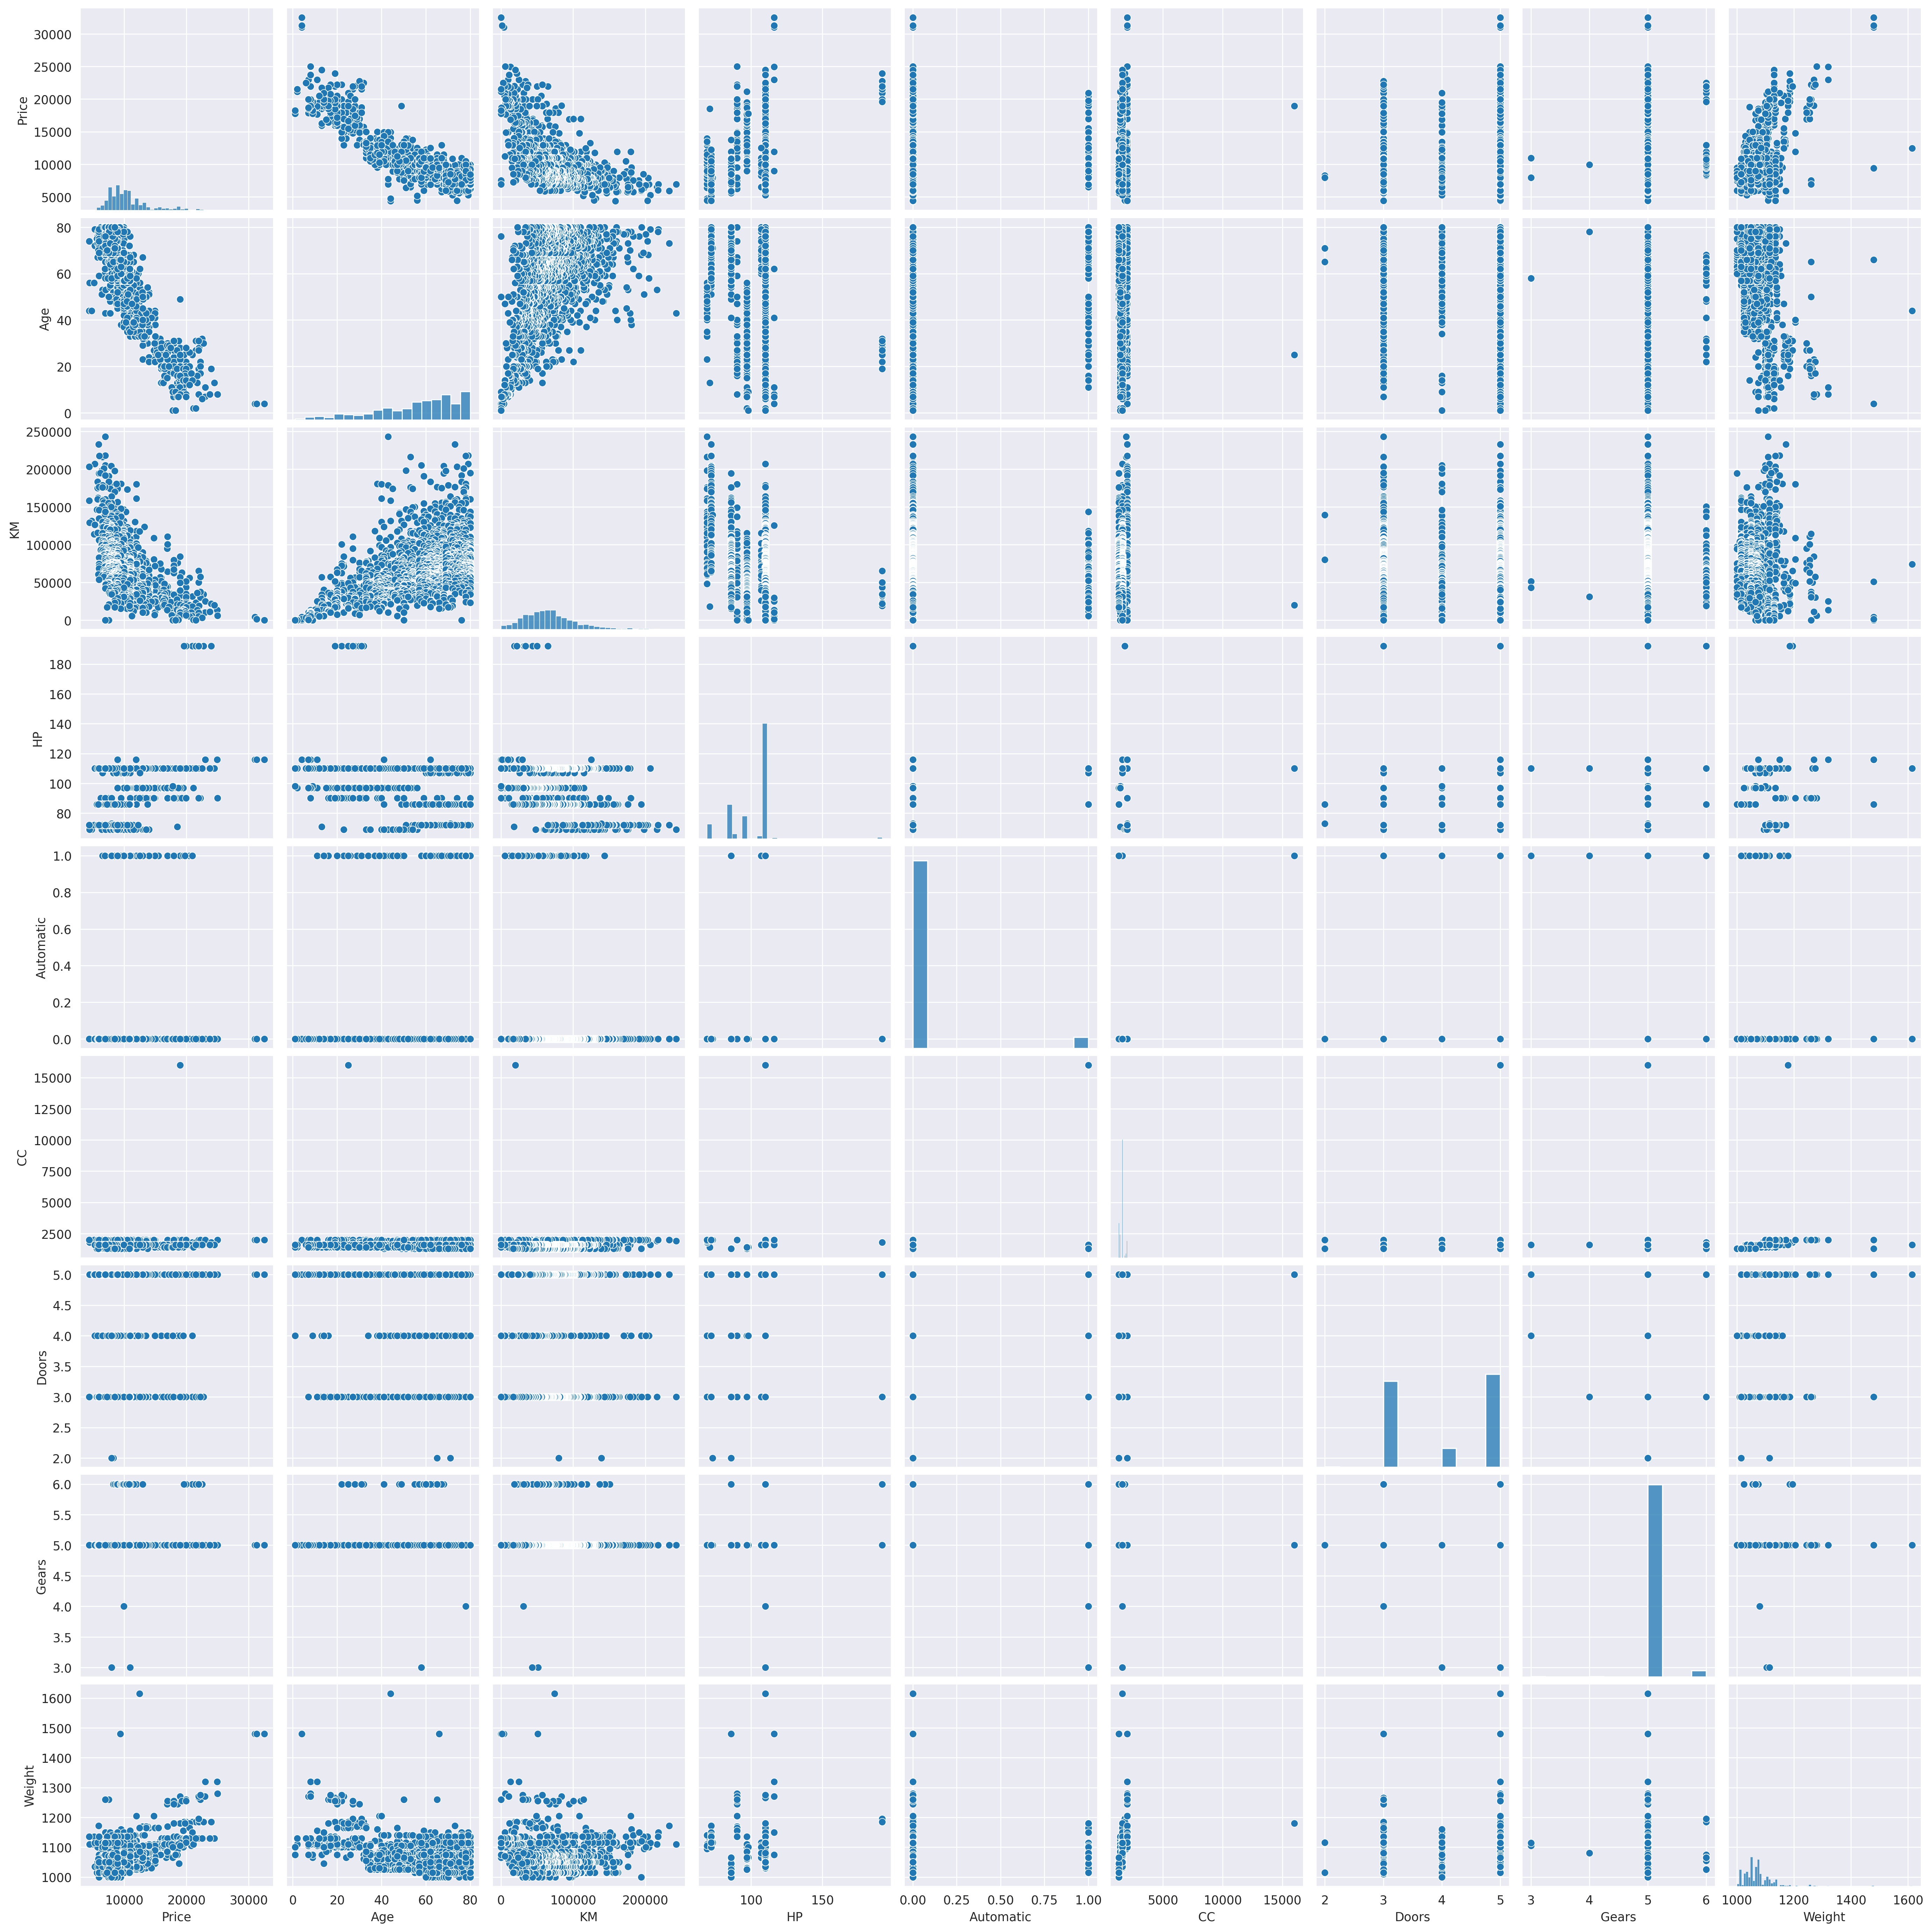

In [15]:
sns.pairplot(df)

* Price is inversly proportional to Age as well as KM diven of the car.

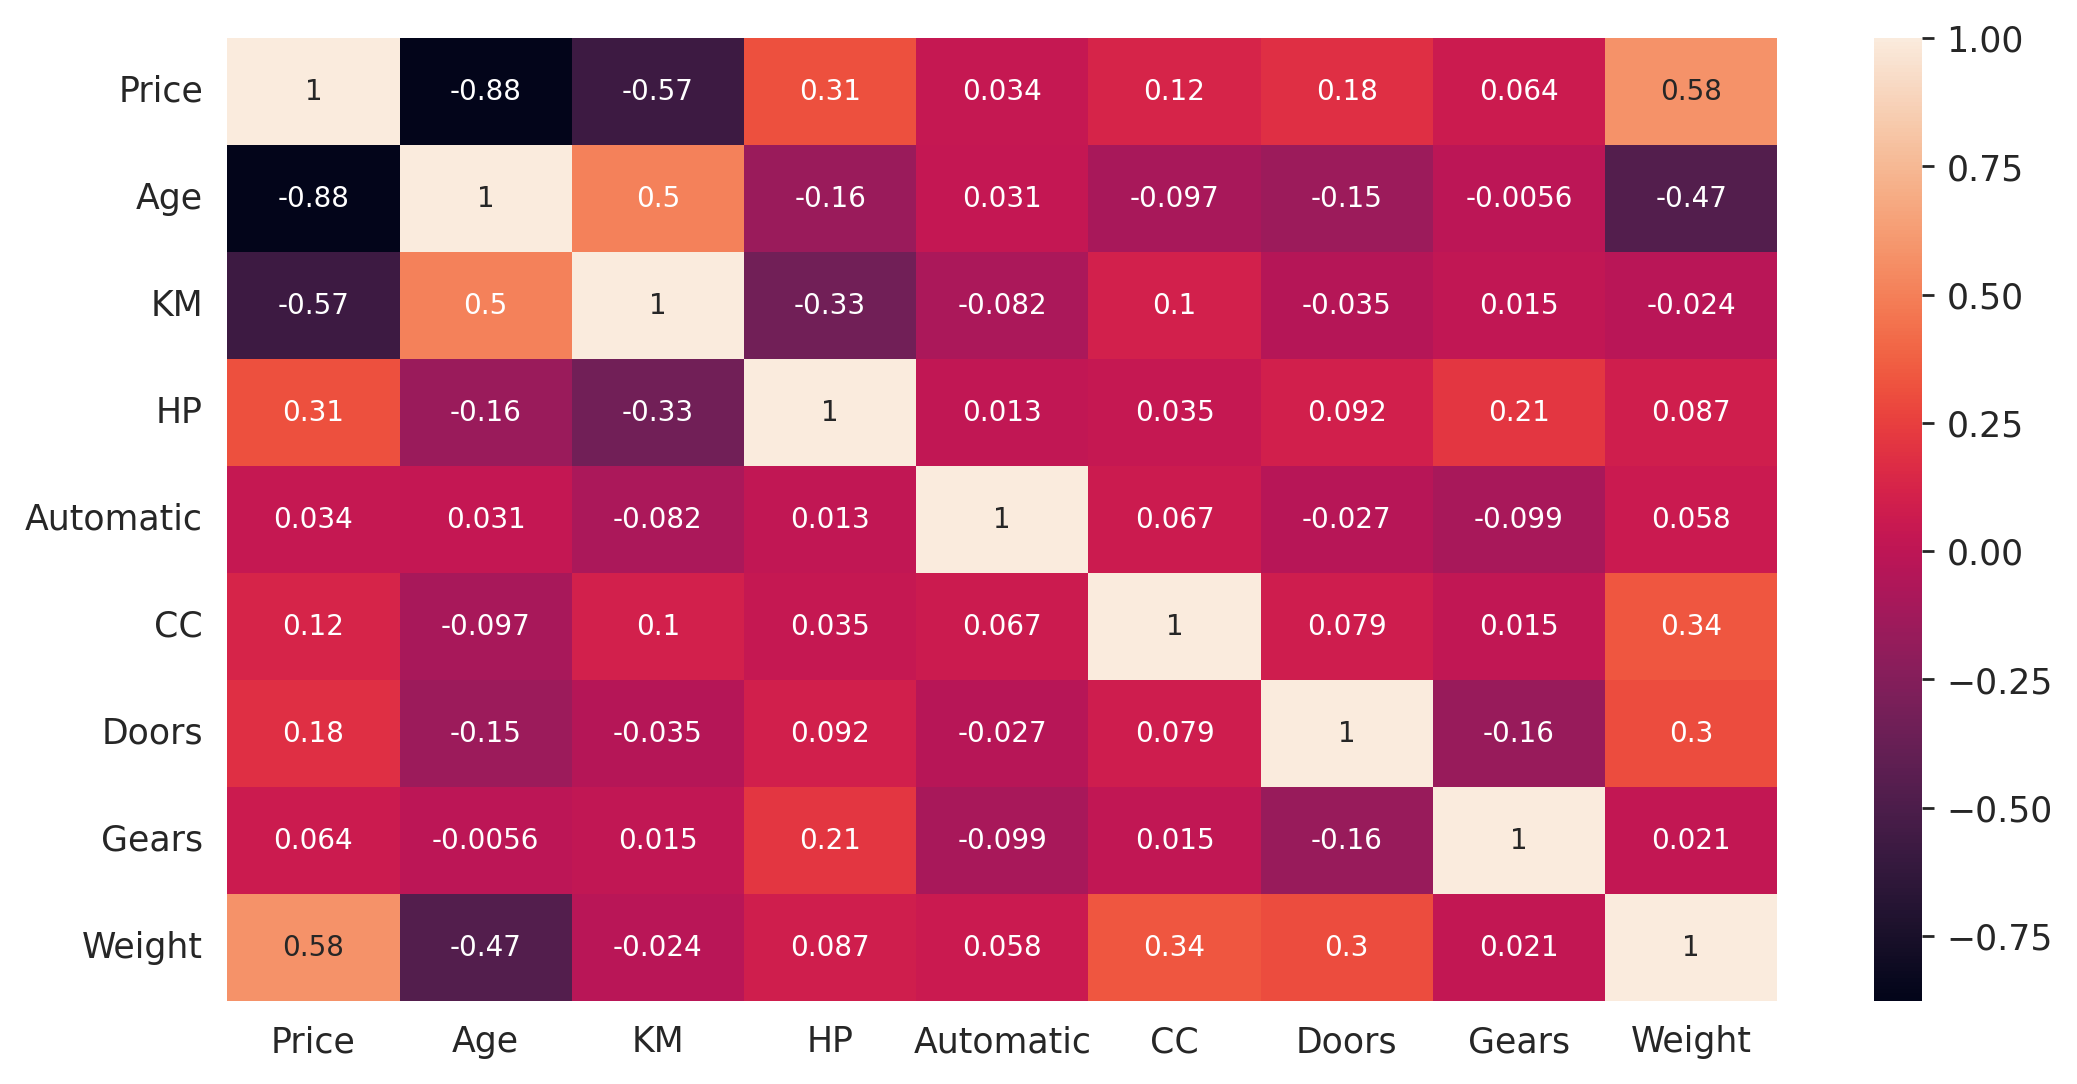

In [16]:
#Correlation
corr = df.corr(method='pearson', min_periods=1, numeric_only=True)
sns.heatmap(corr, annot=True,annot_kws={"size":8})
plt.show()

* Price and Age are highly negatively correlated.

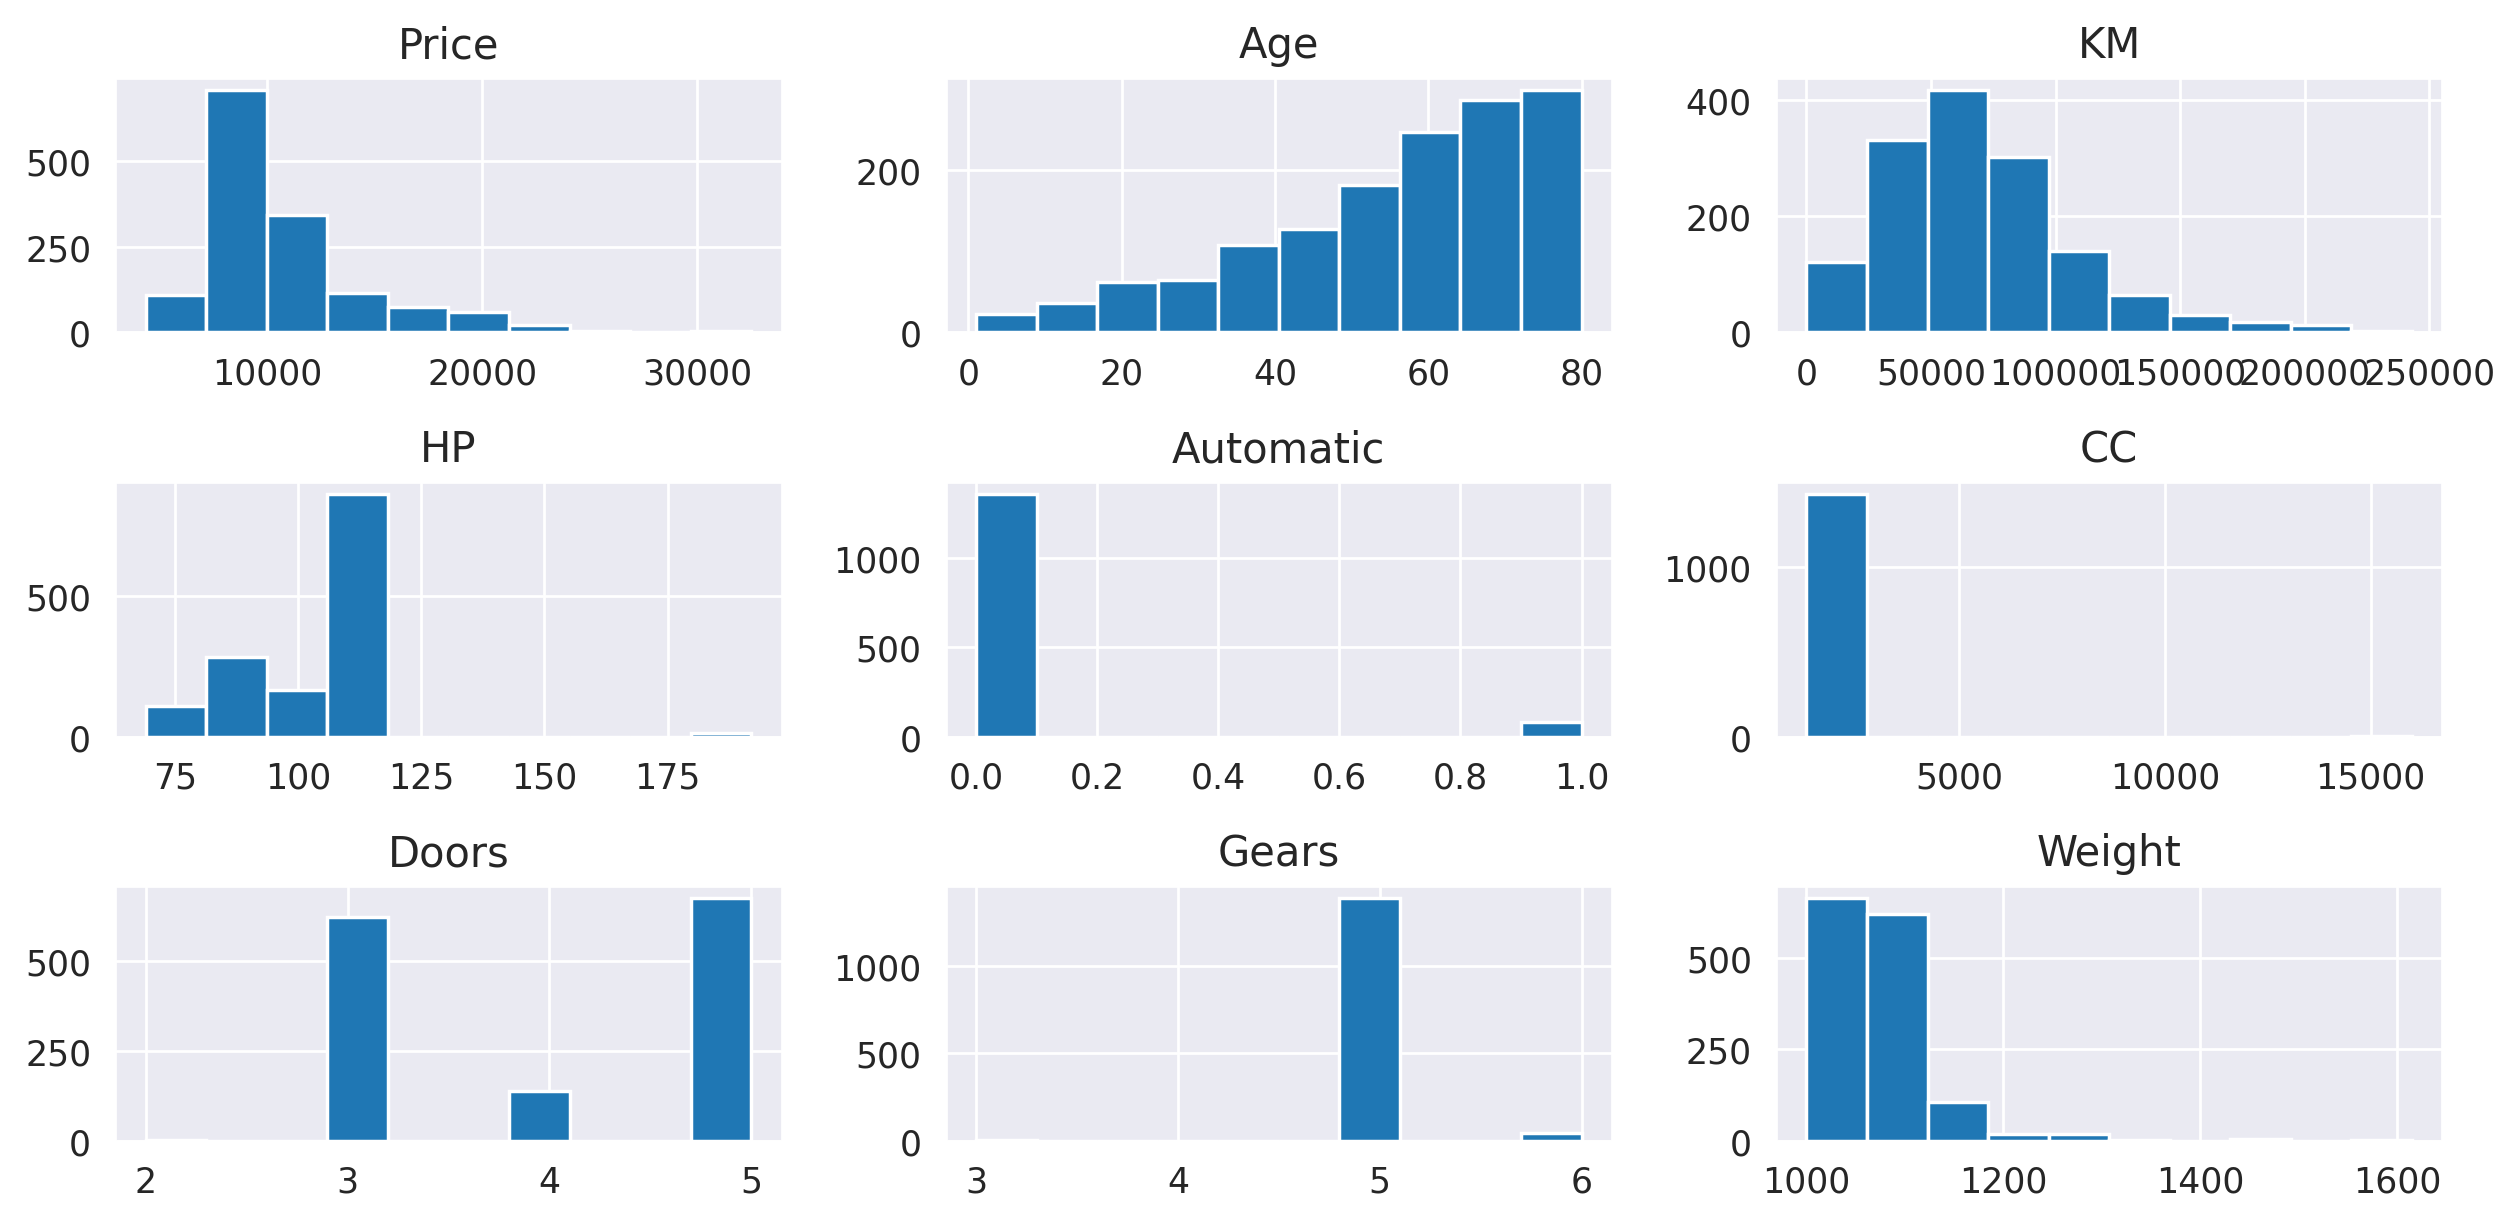

In [17]:
df.hist()
plt.tight_layout()

# Models

In [18]:
df1 = df.copy()

In [19]:
#One-Hot Encoding
df1 = pd.get_dummies(data=df1,columns= ['Fuel_Type'], dtype = int)
df1

Price  Age     KM   HP  Automatic    CC  Doors  Gears  Weight  \
0     13500   23  46986   90          0  2000      3      5    1165   
1     13750   23  72937   90          0  2000      3      5    1165   
2     13950   24  41711   90          0  2000      3      5    1165   
3     14950   26  48000   90          0  2000      3      5    1165   
4     13750   30  38500   90          0  2000      3      5    1170   
...     ...  ...    ...  ...        ...   ...    ...    ...     ...   
1431   7500   69  20544   86          0  1300      3      5    1025   
1432  10845   72  19000   86          0  1300      3      5    1015   
1433   8500   71  17016   86          0  1300      3      5    1015   
1434   7250   70  16916   86          0  1300      3      5    1015   
1435   6950   76      1  110          0  1600      5      5    1114   

      Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Petrol  
0                 0                 1                 0  
1                 0                 1                 0  
2                 0                 1                 0  
3                 0                 1                 0  
4                 0                 1                 0  
...             ...               ...               ...  
1431              0                 0                 1  
1432              0                 0                 1  
1433              0                 0                 1  
1434              0                 0                 1  
1435              0                 0                 1  

[1435 rows x 12 columns]

# Outliers

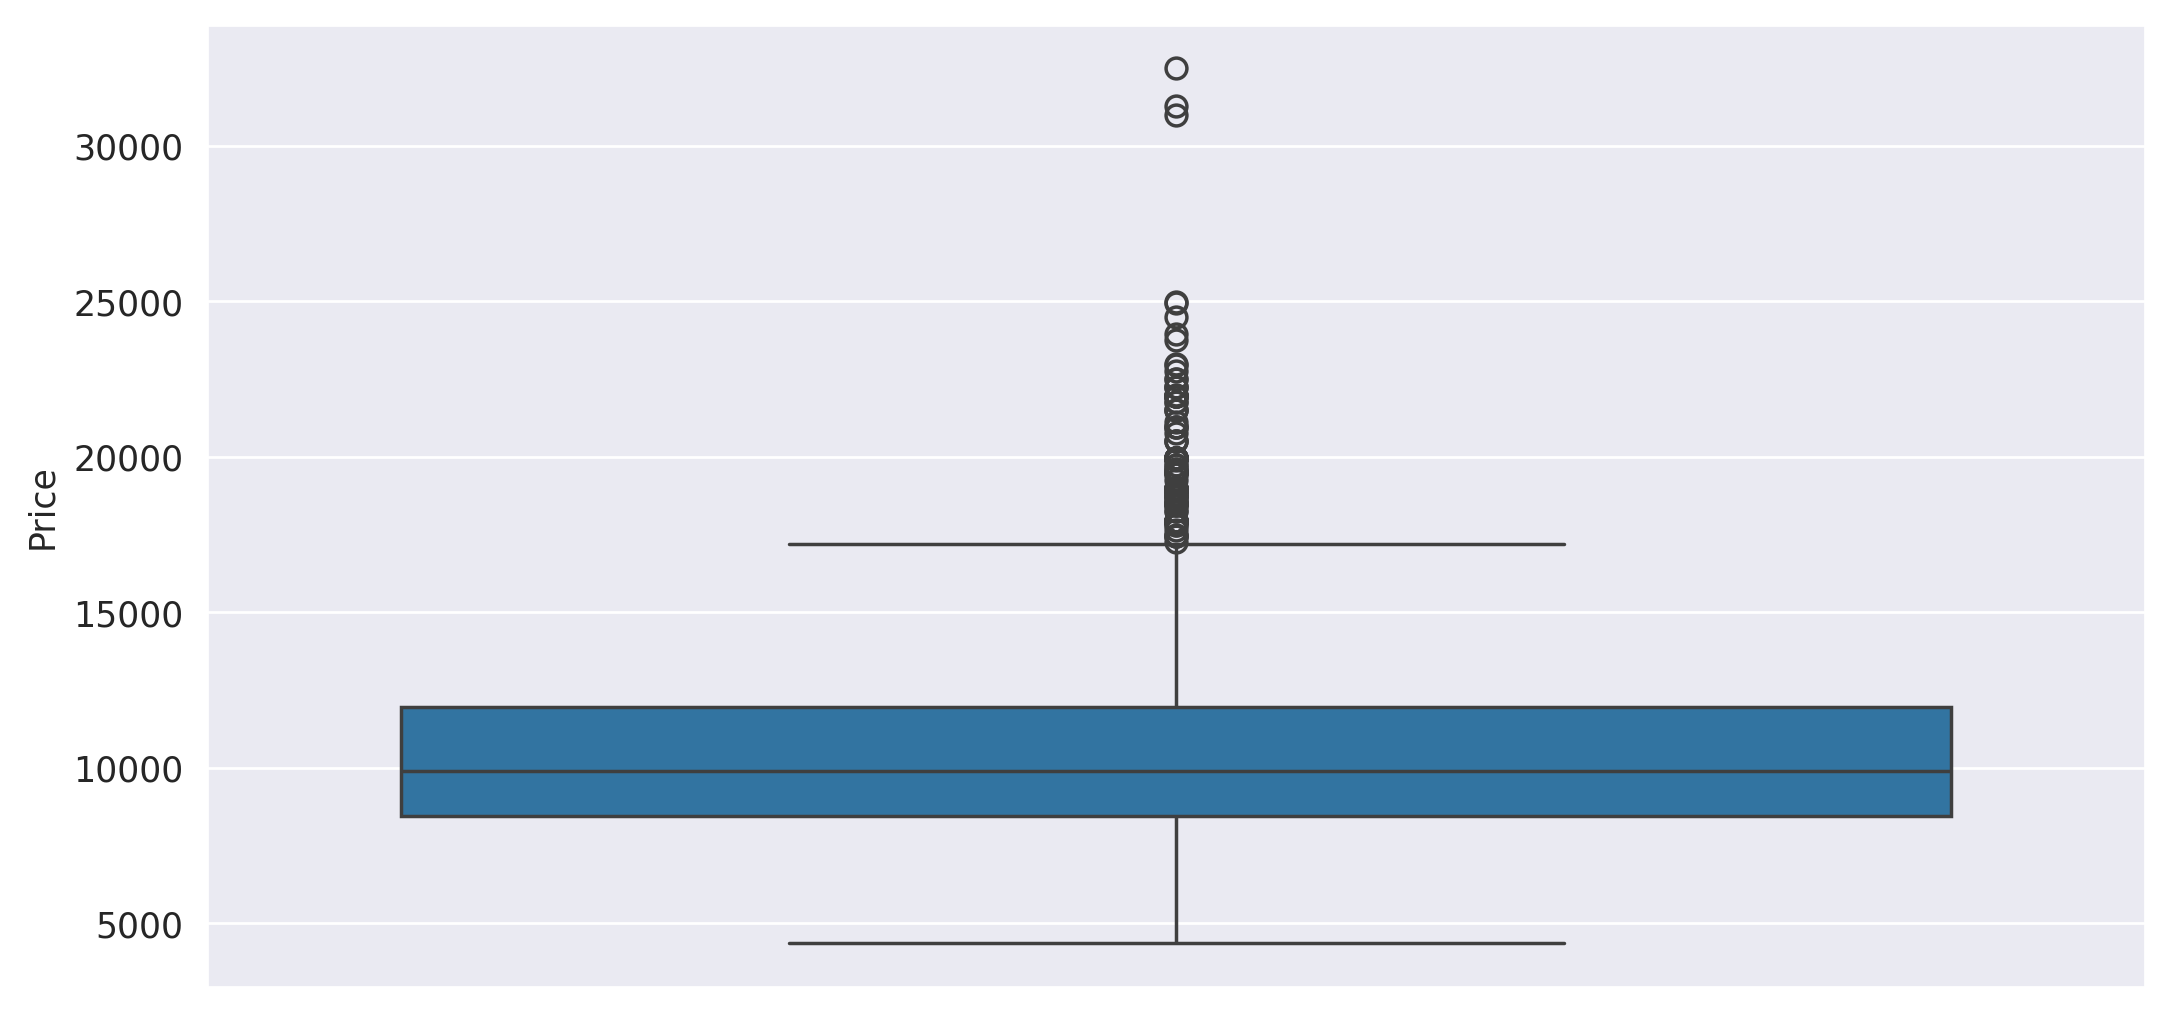

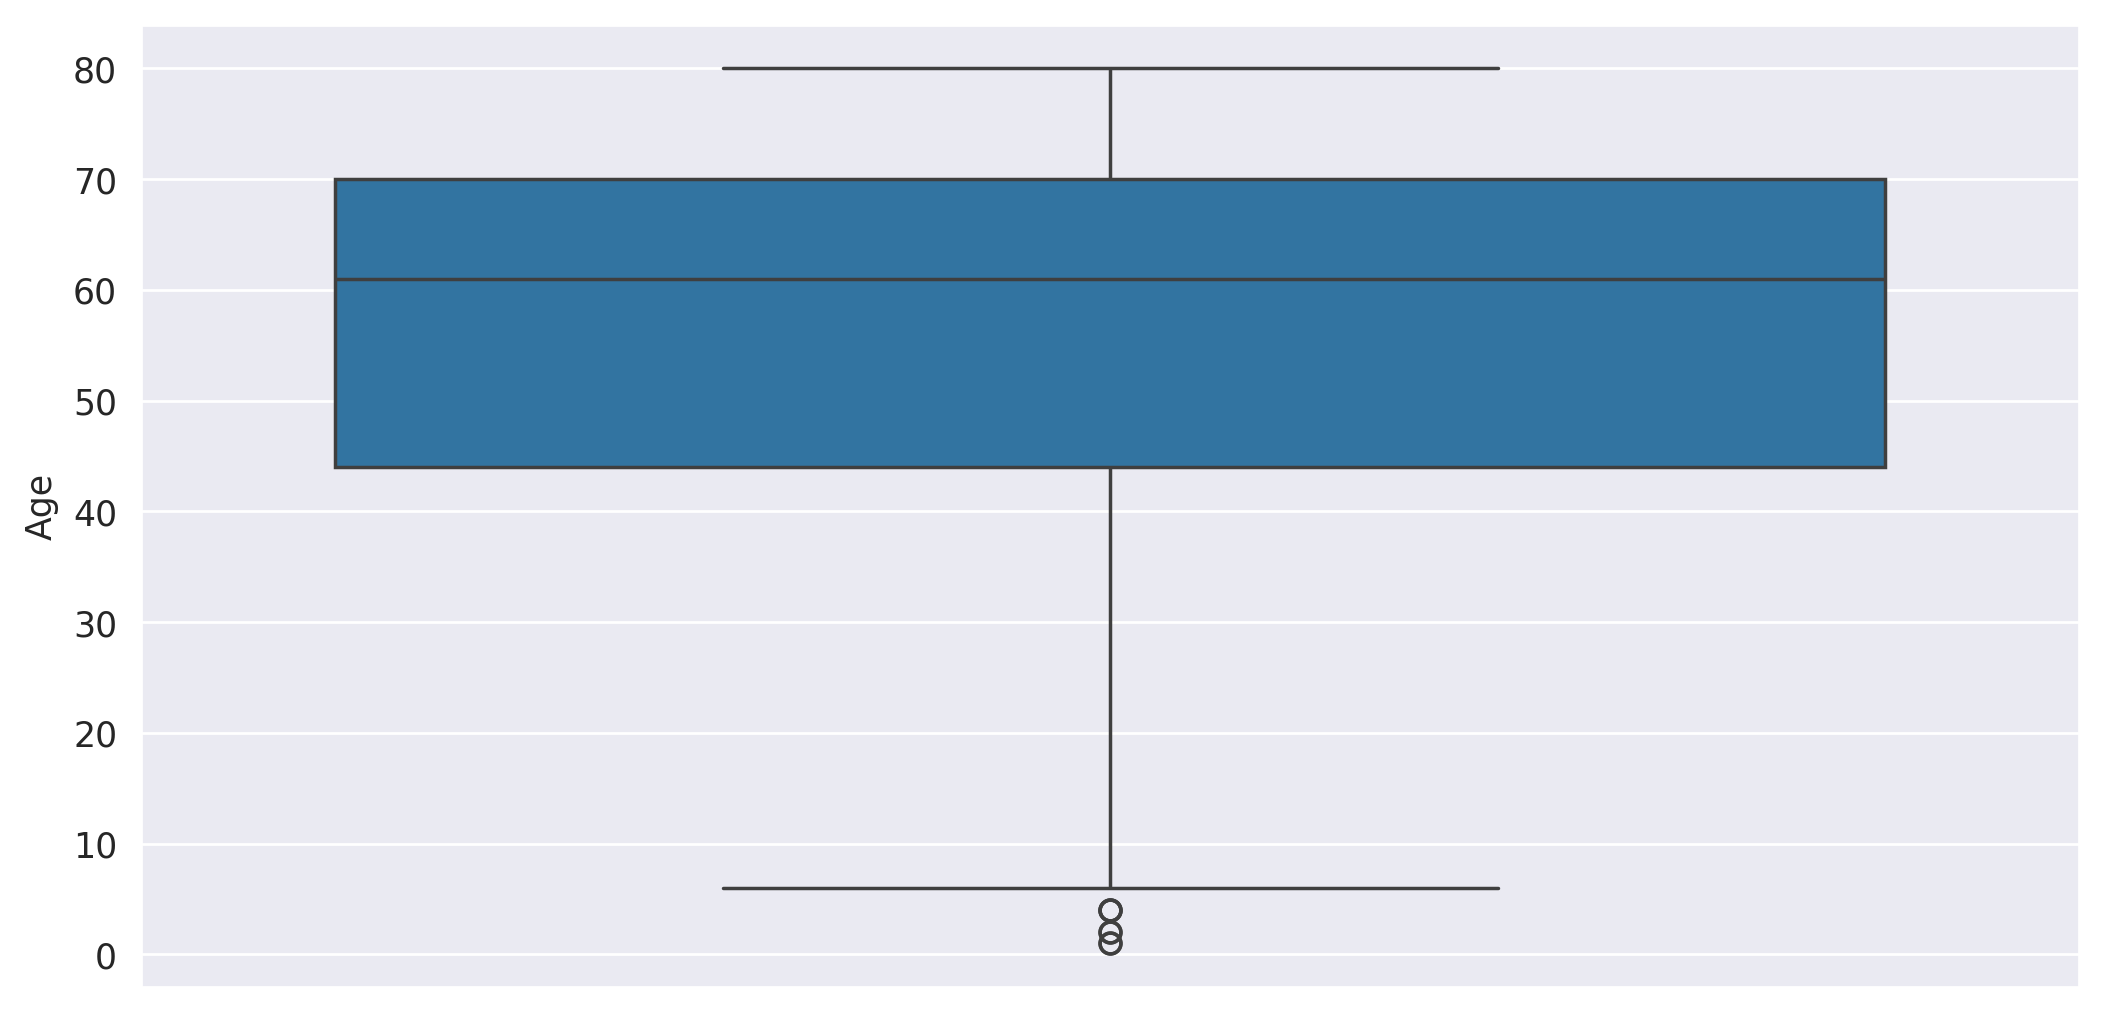

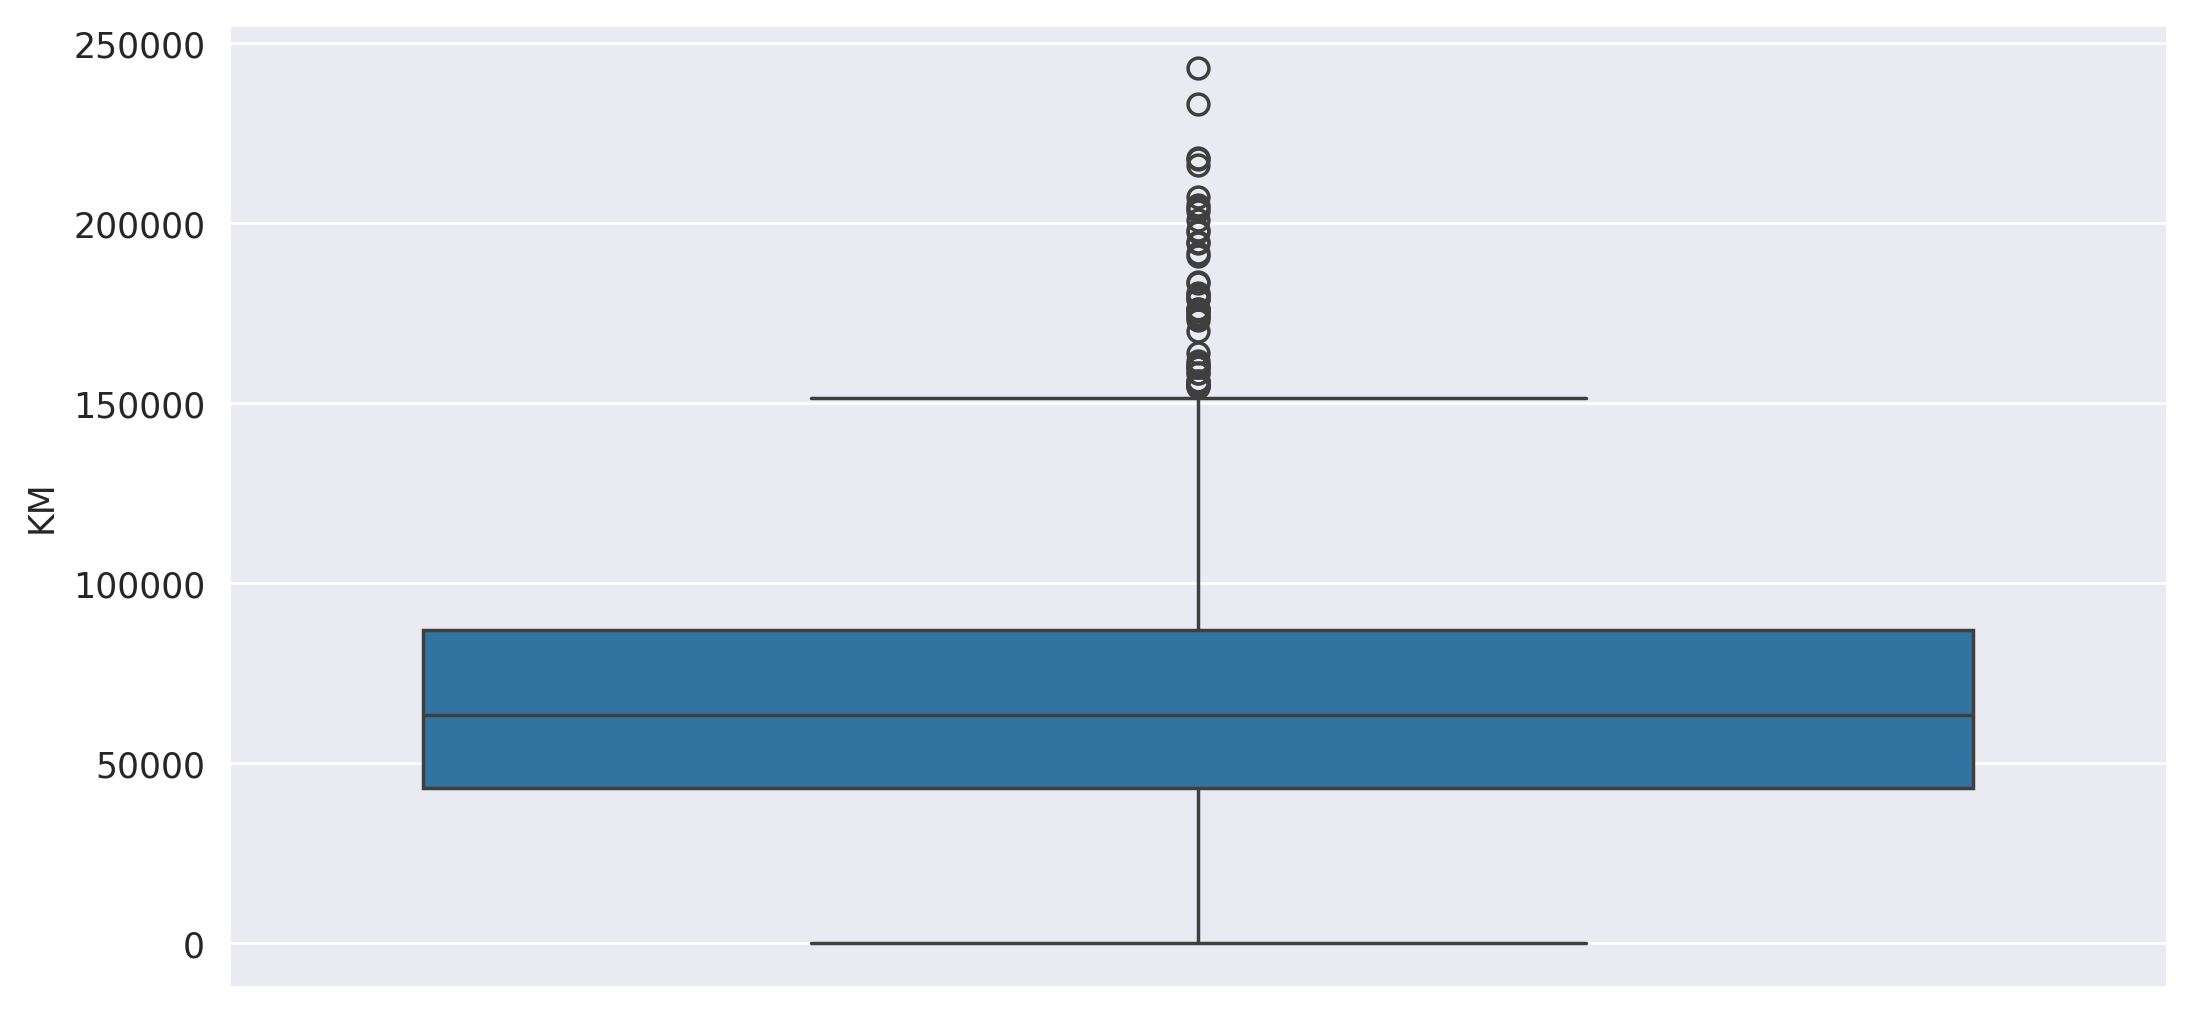

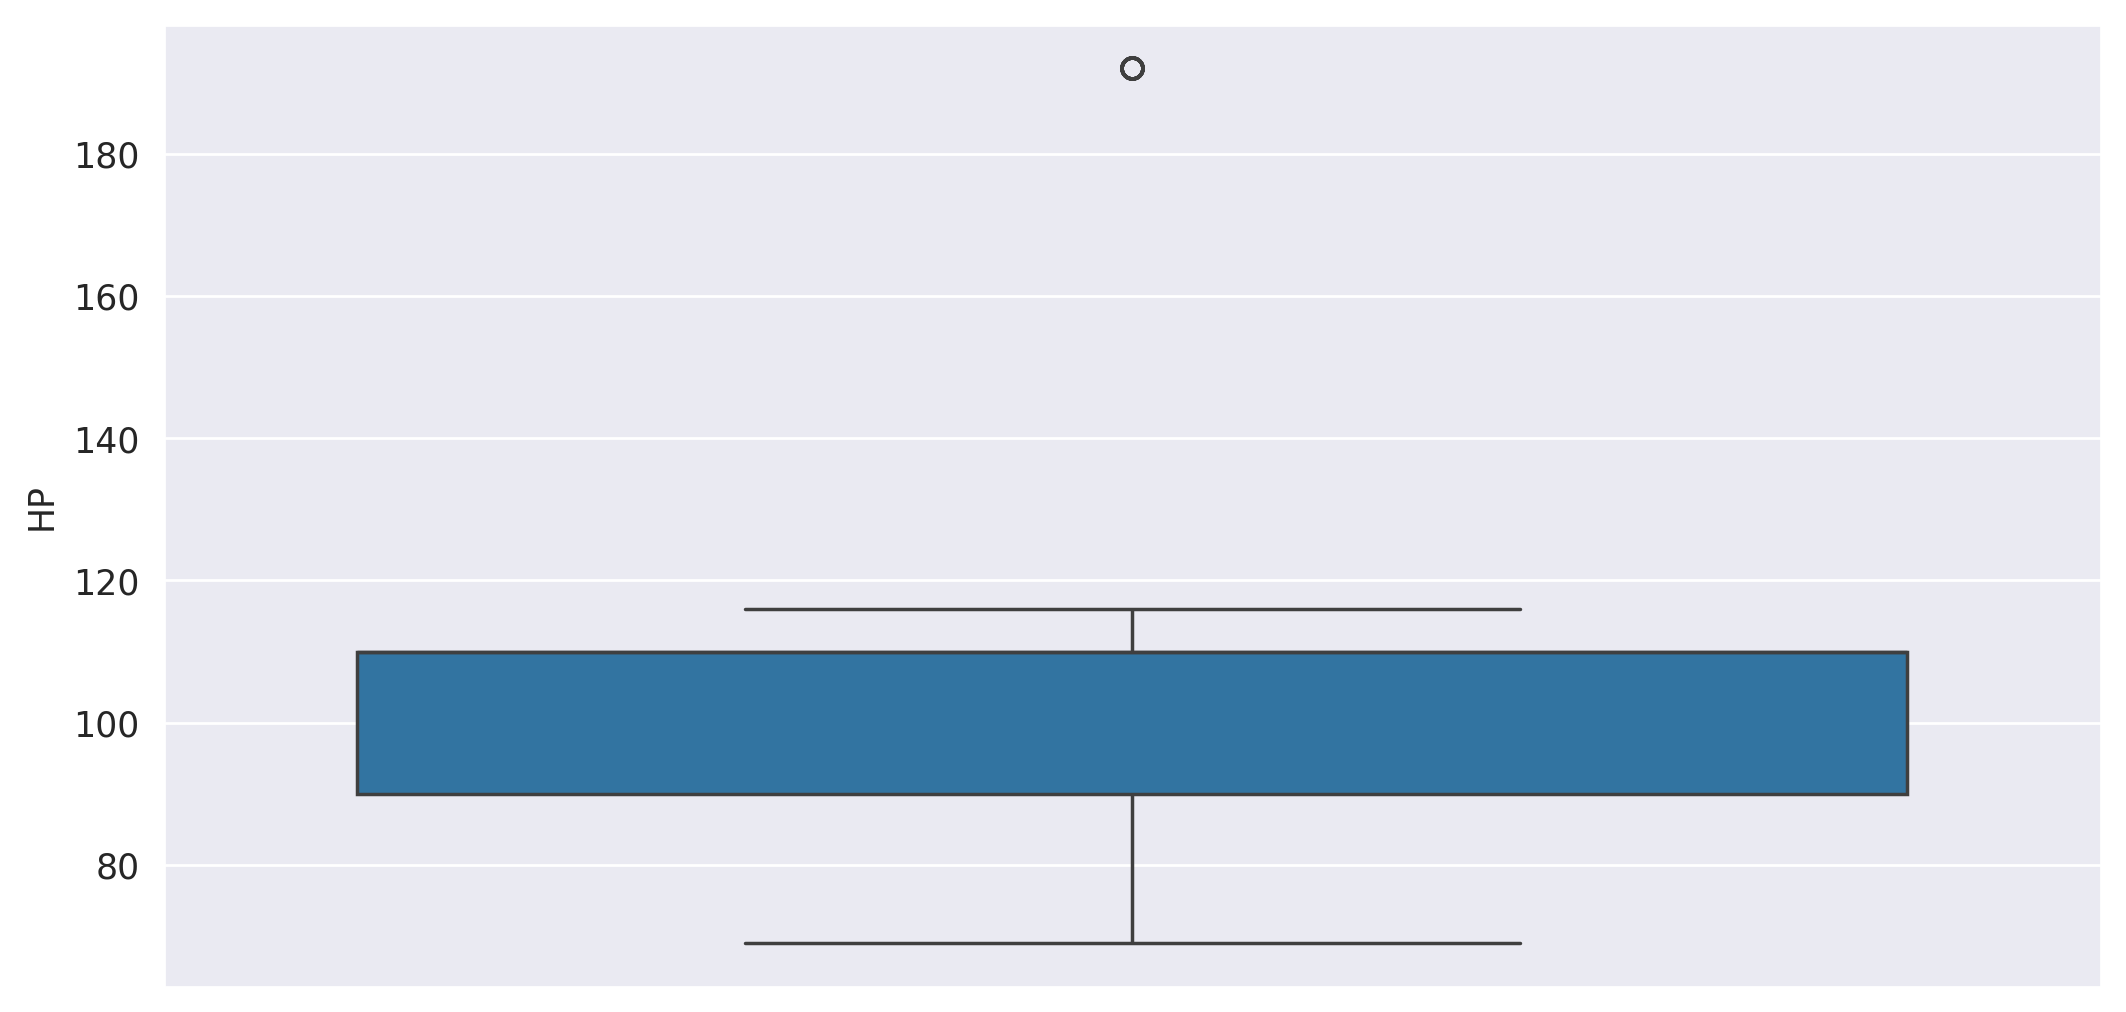

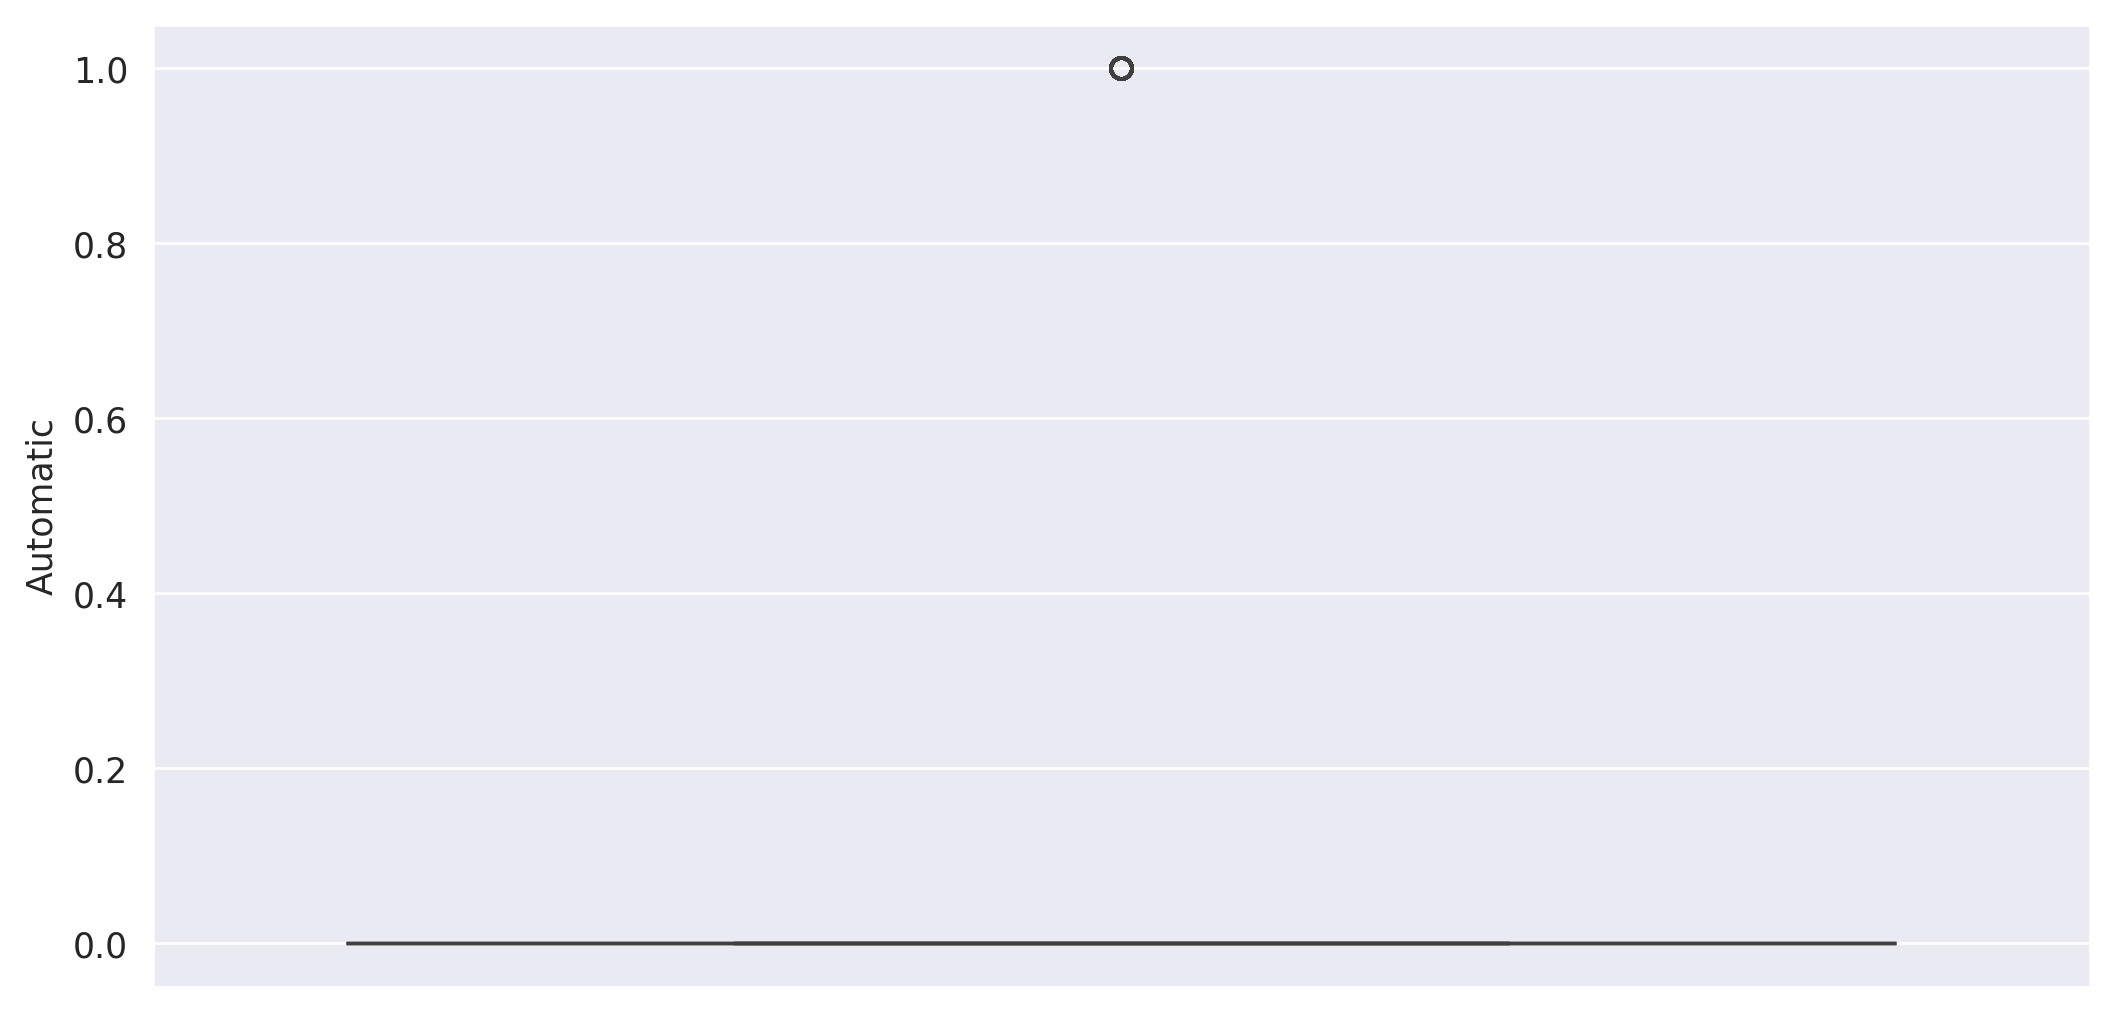

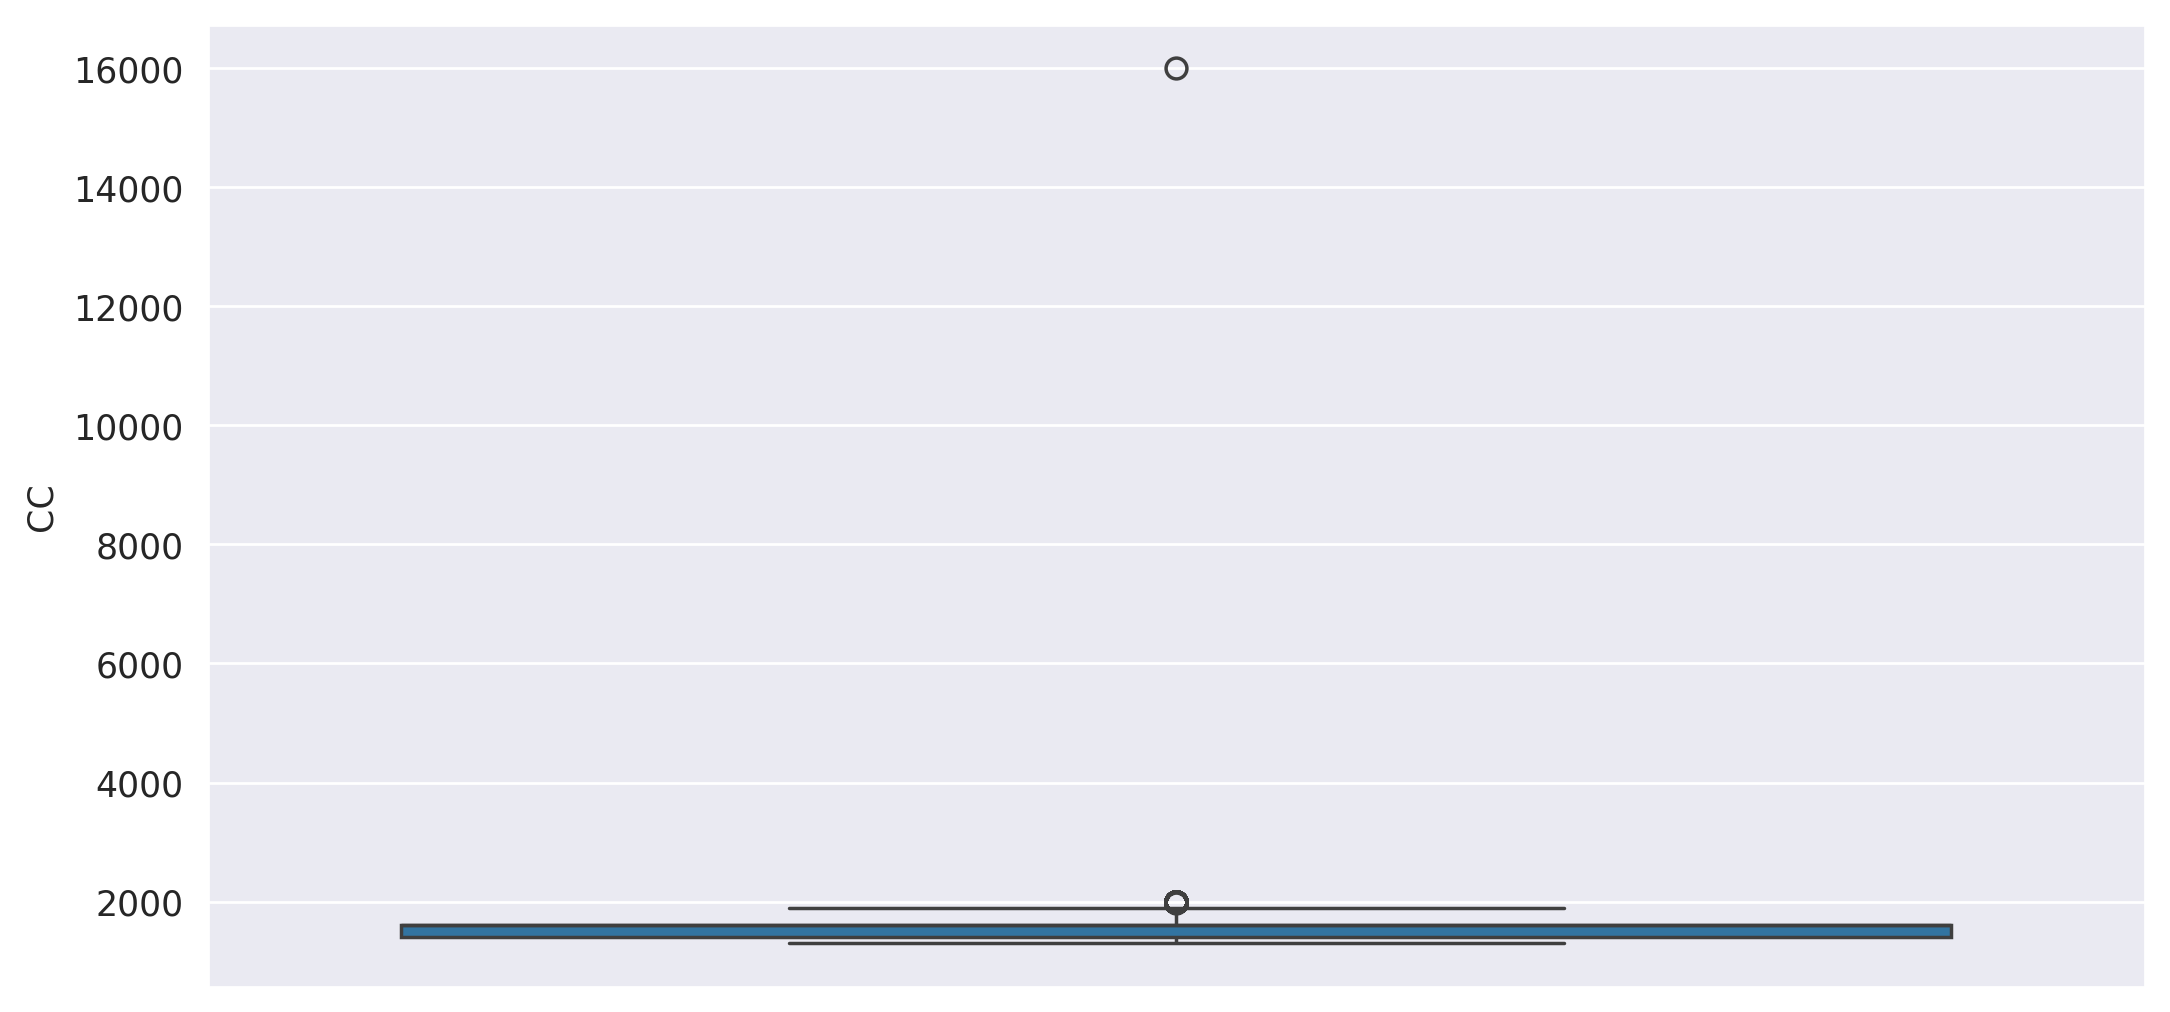

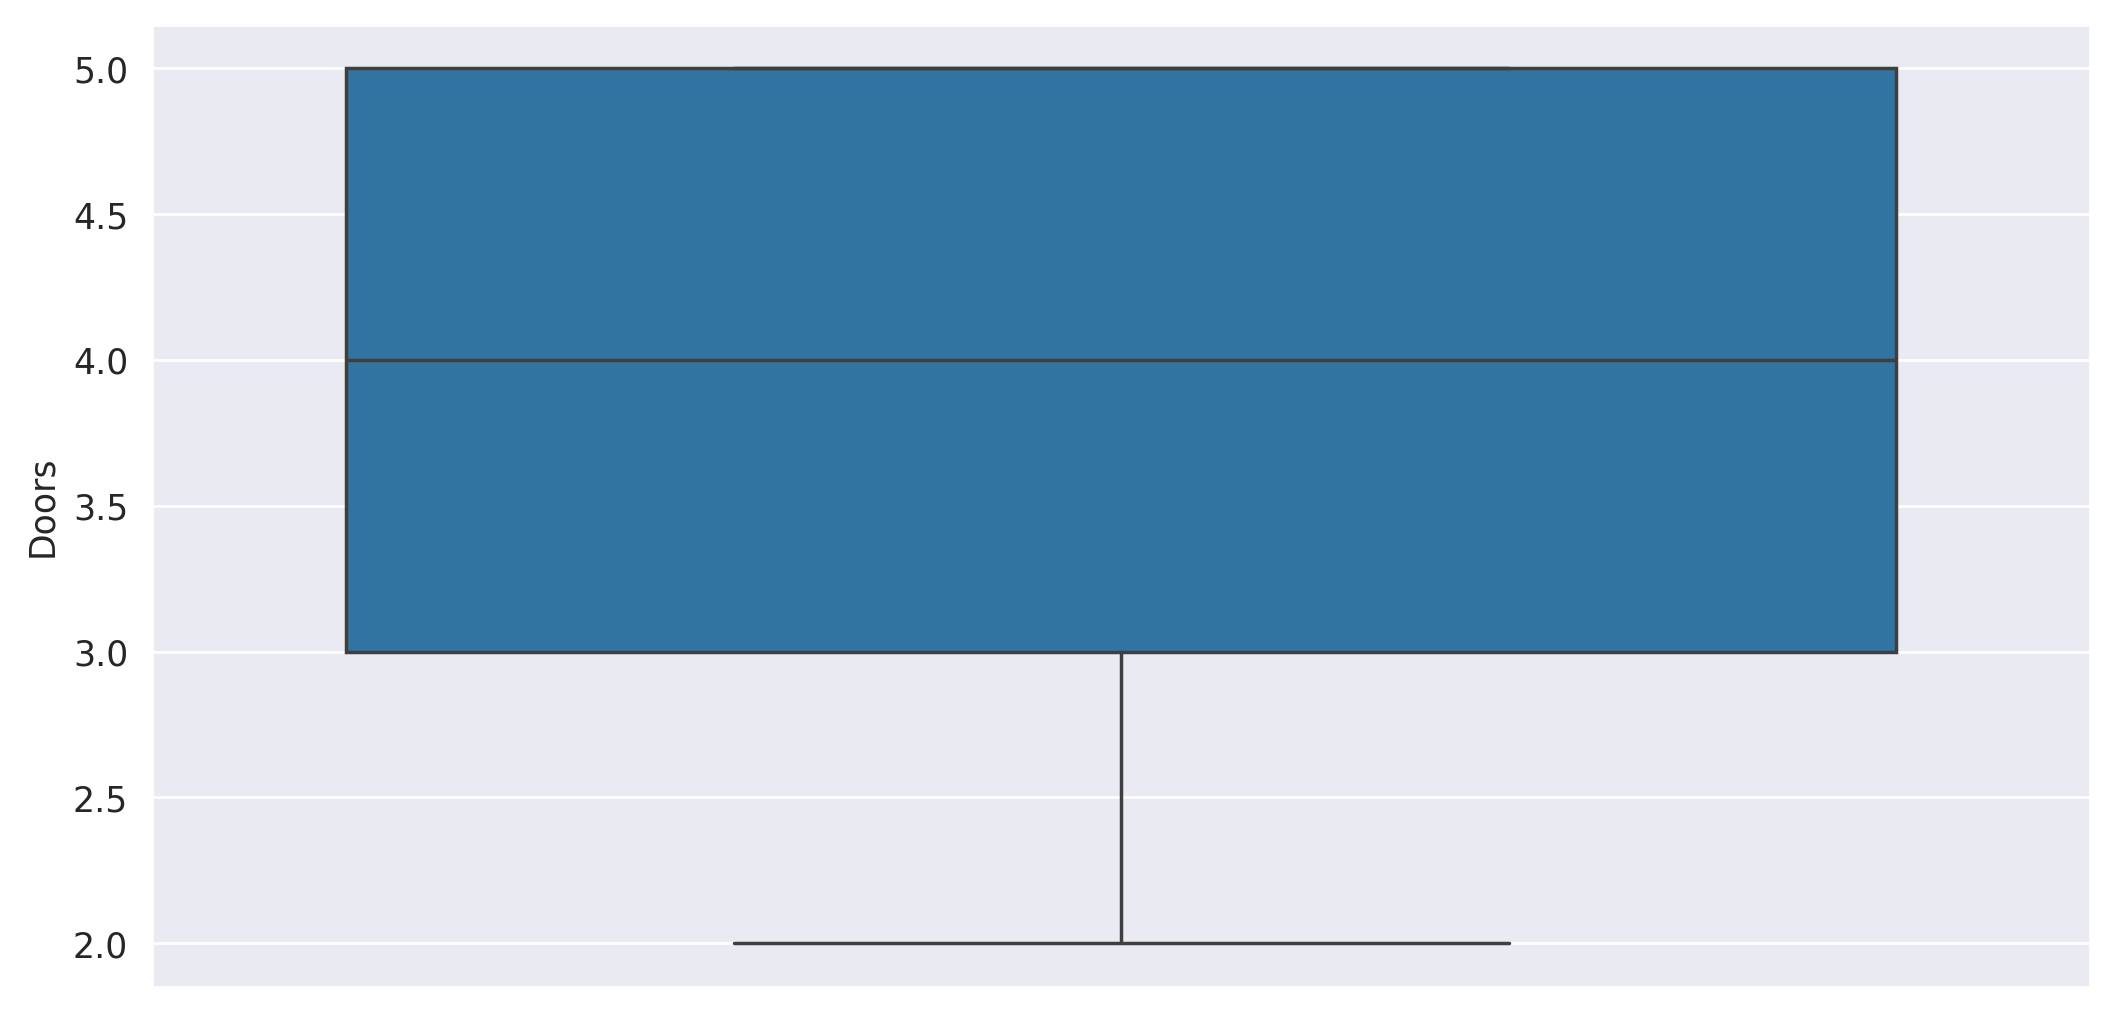

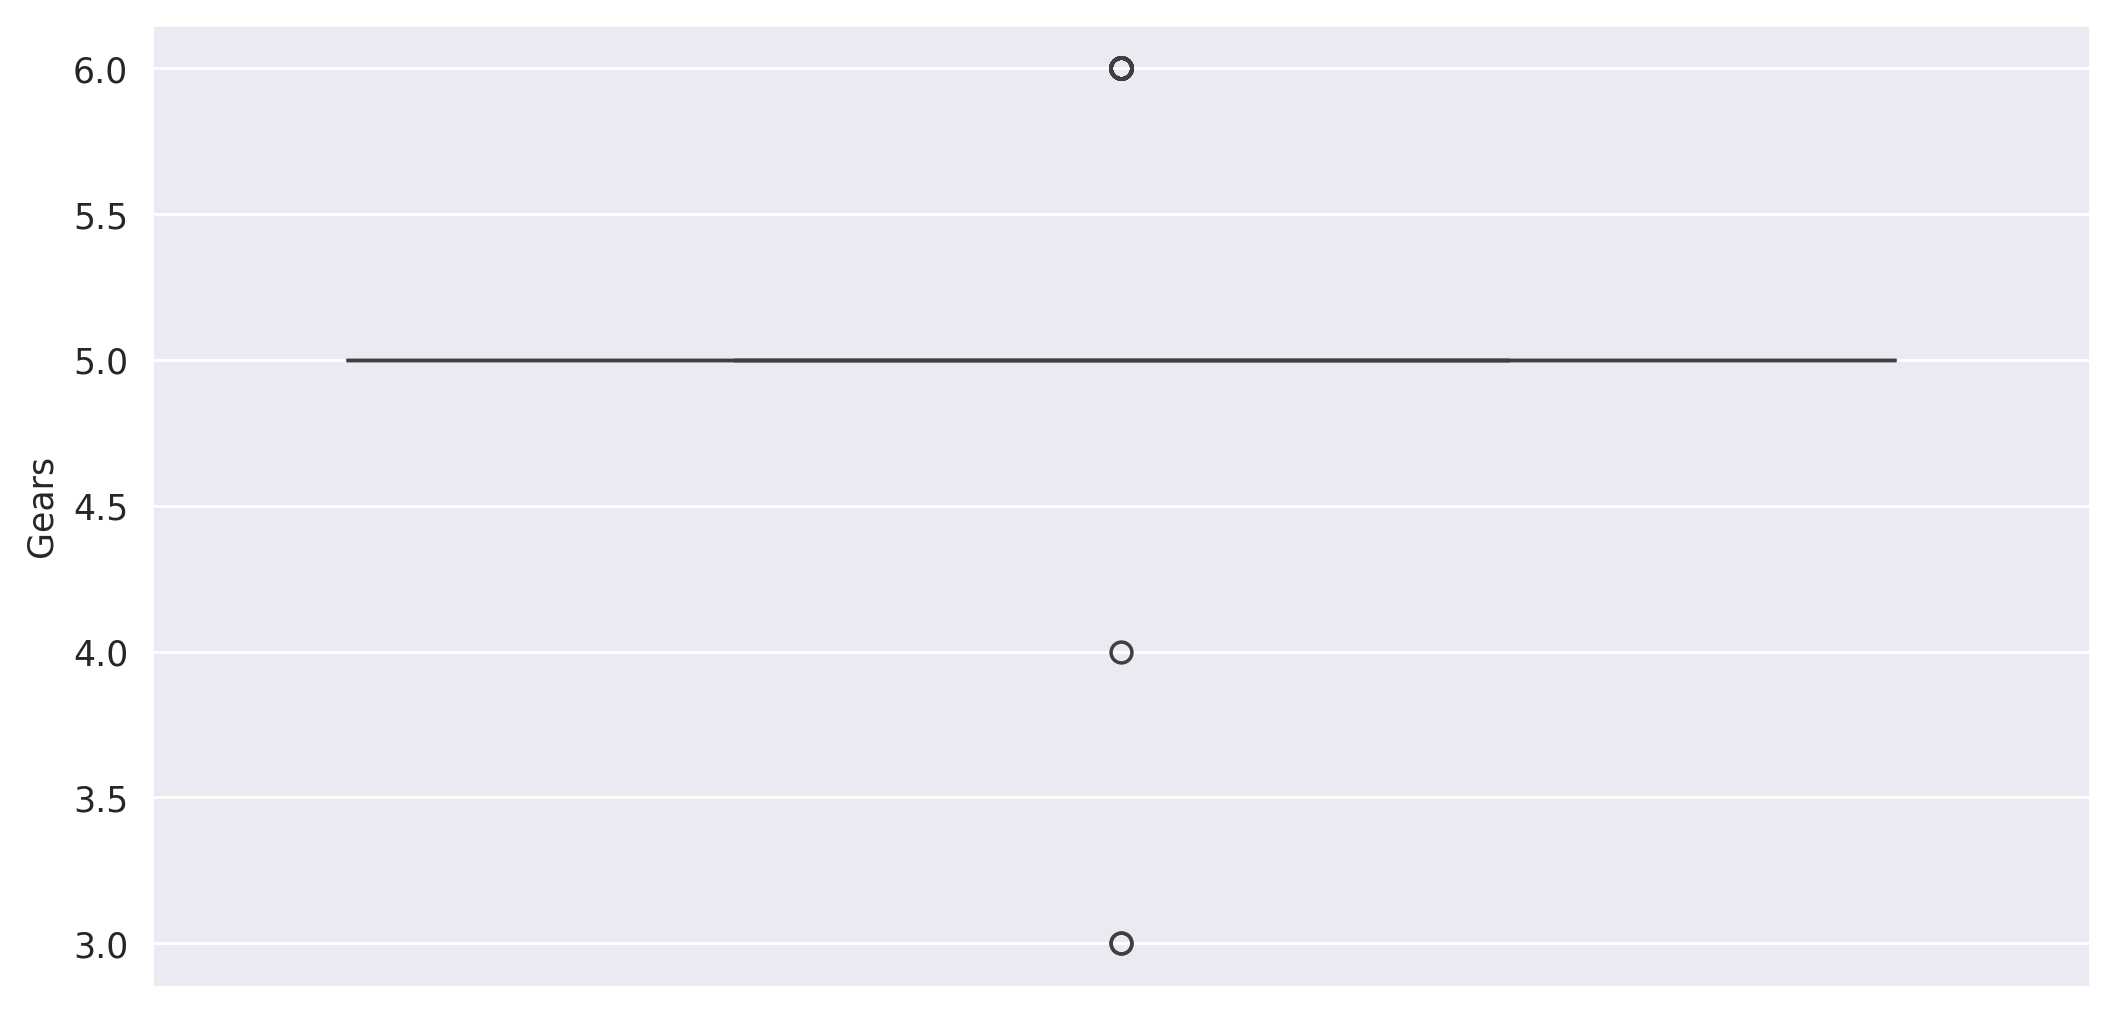

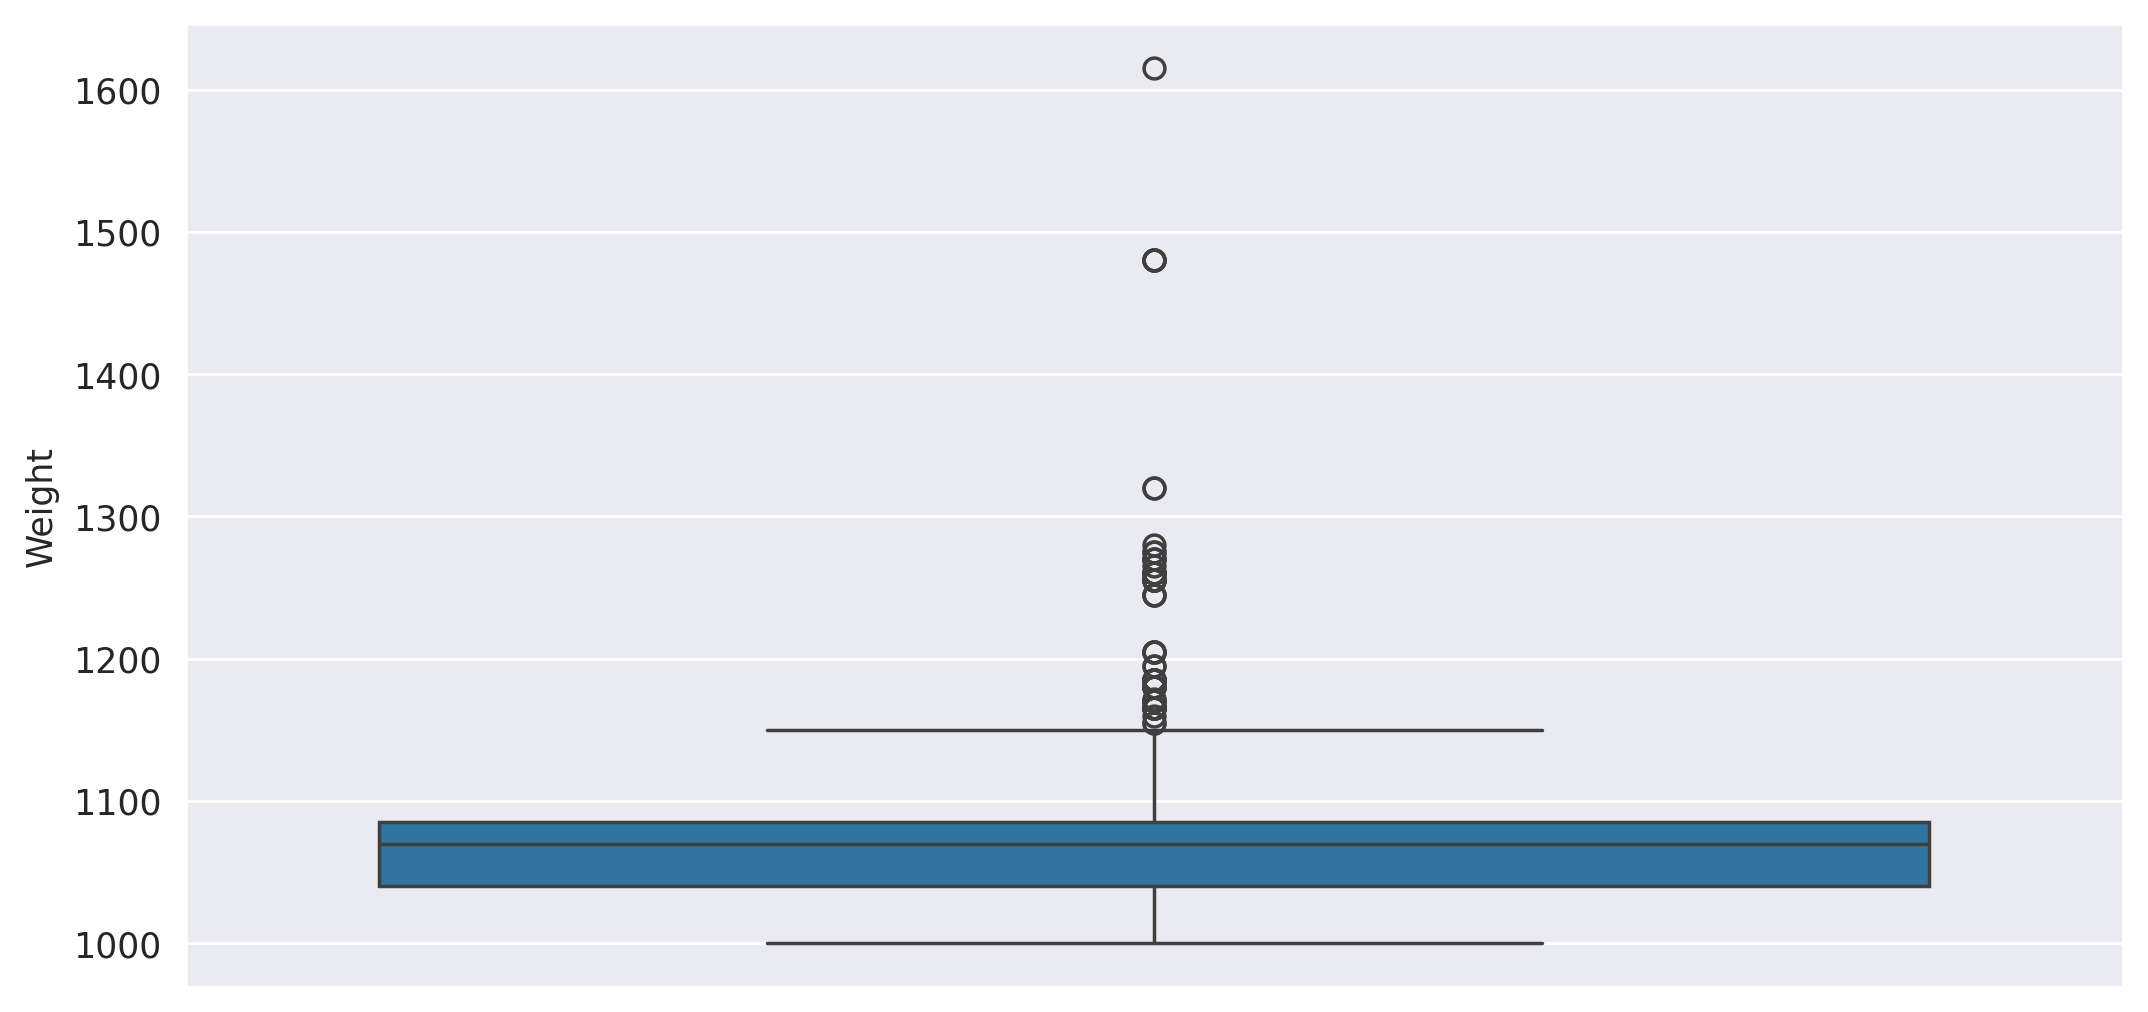

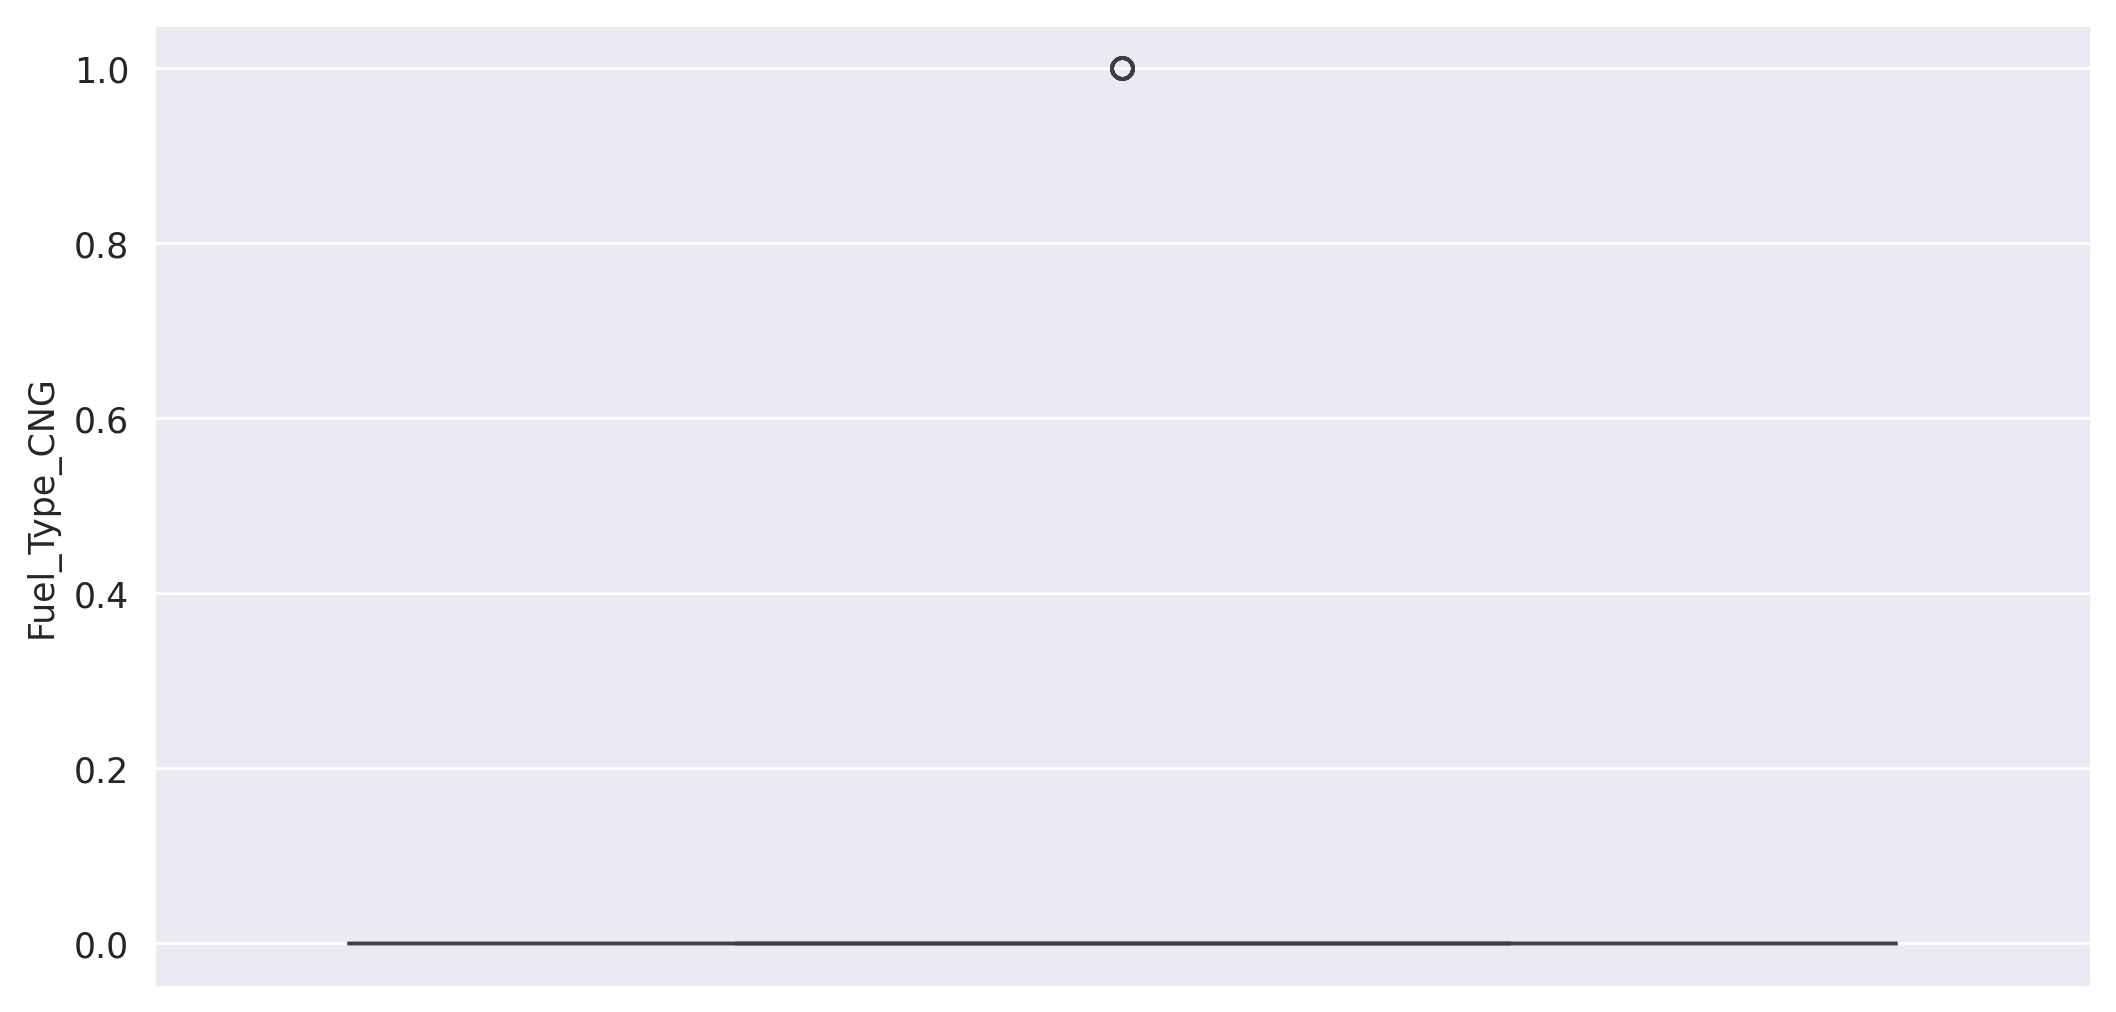

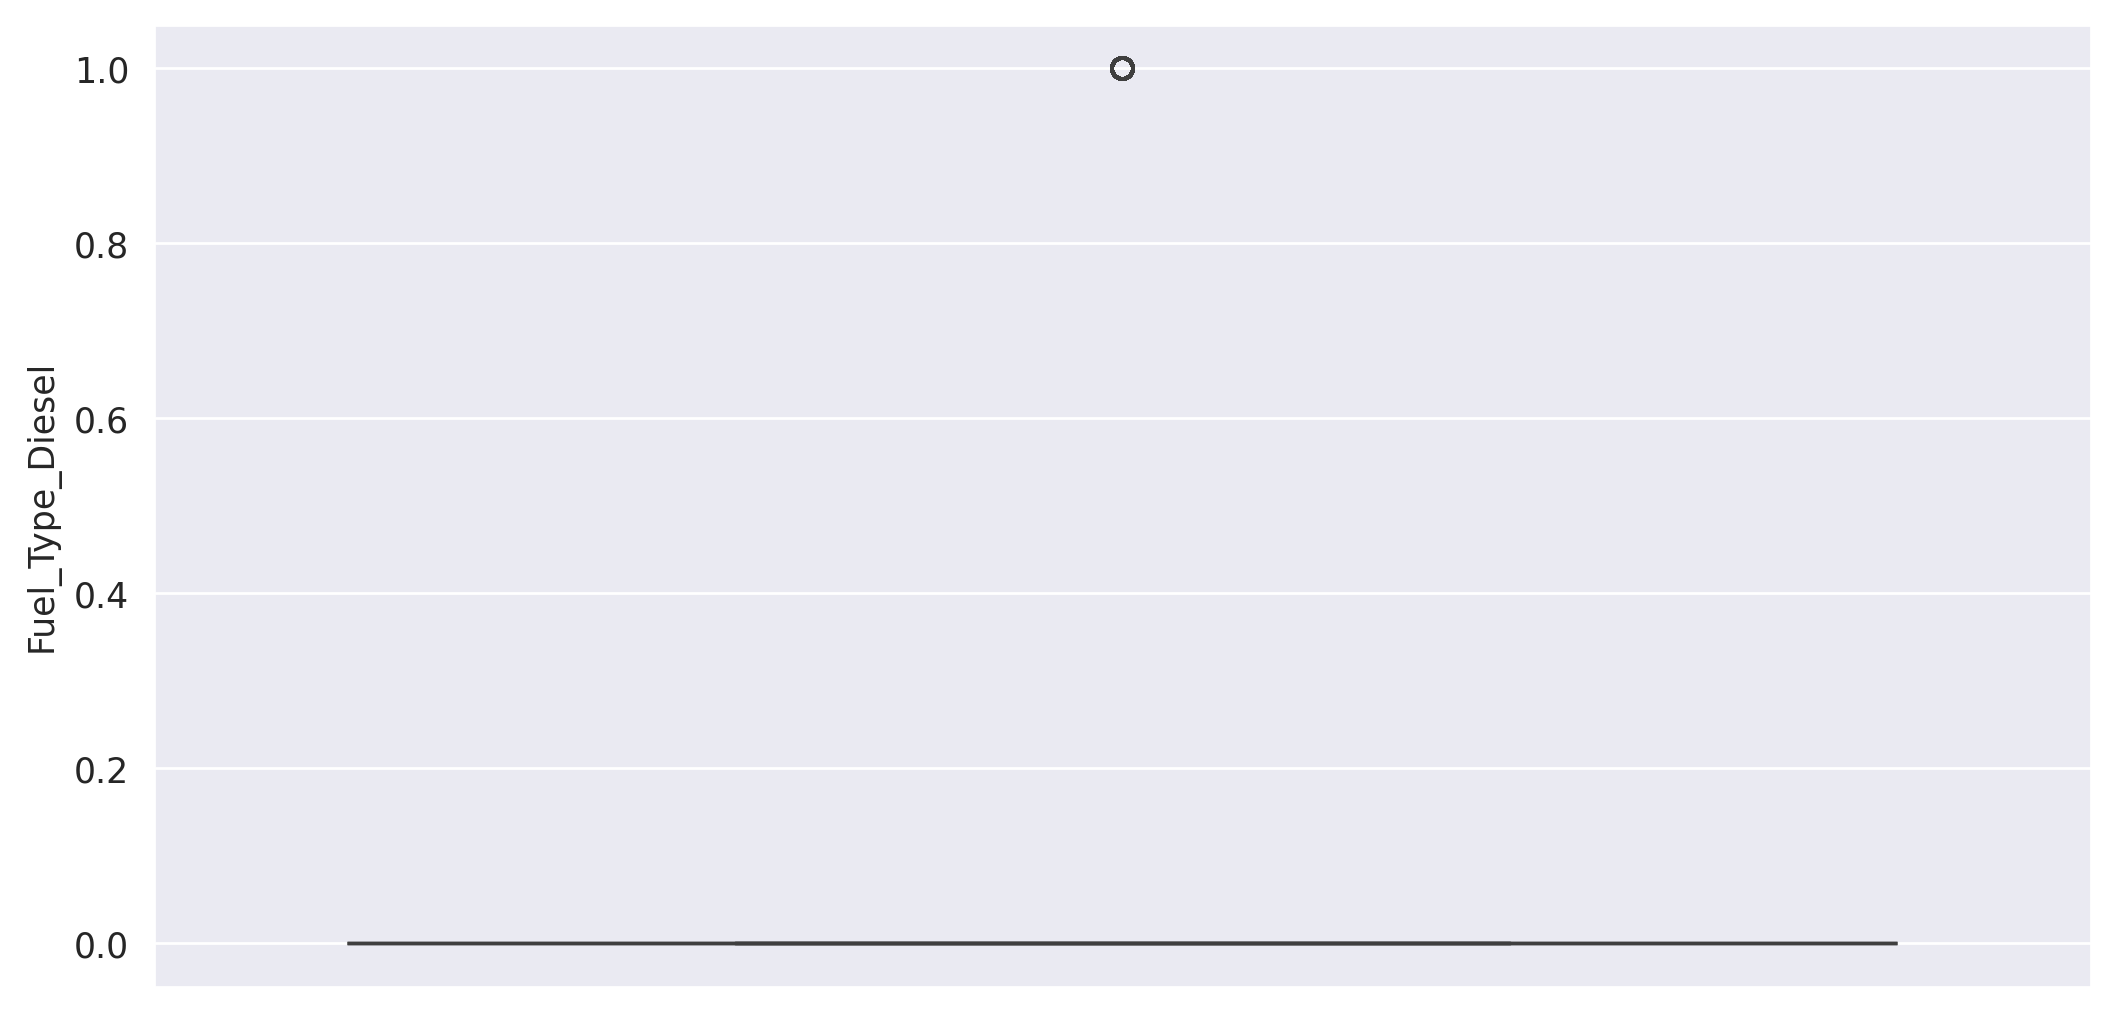

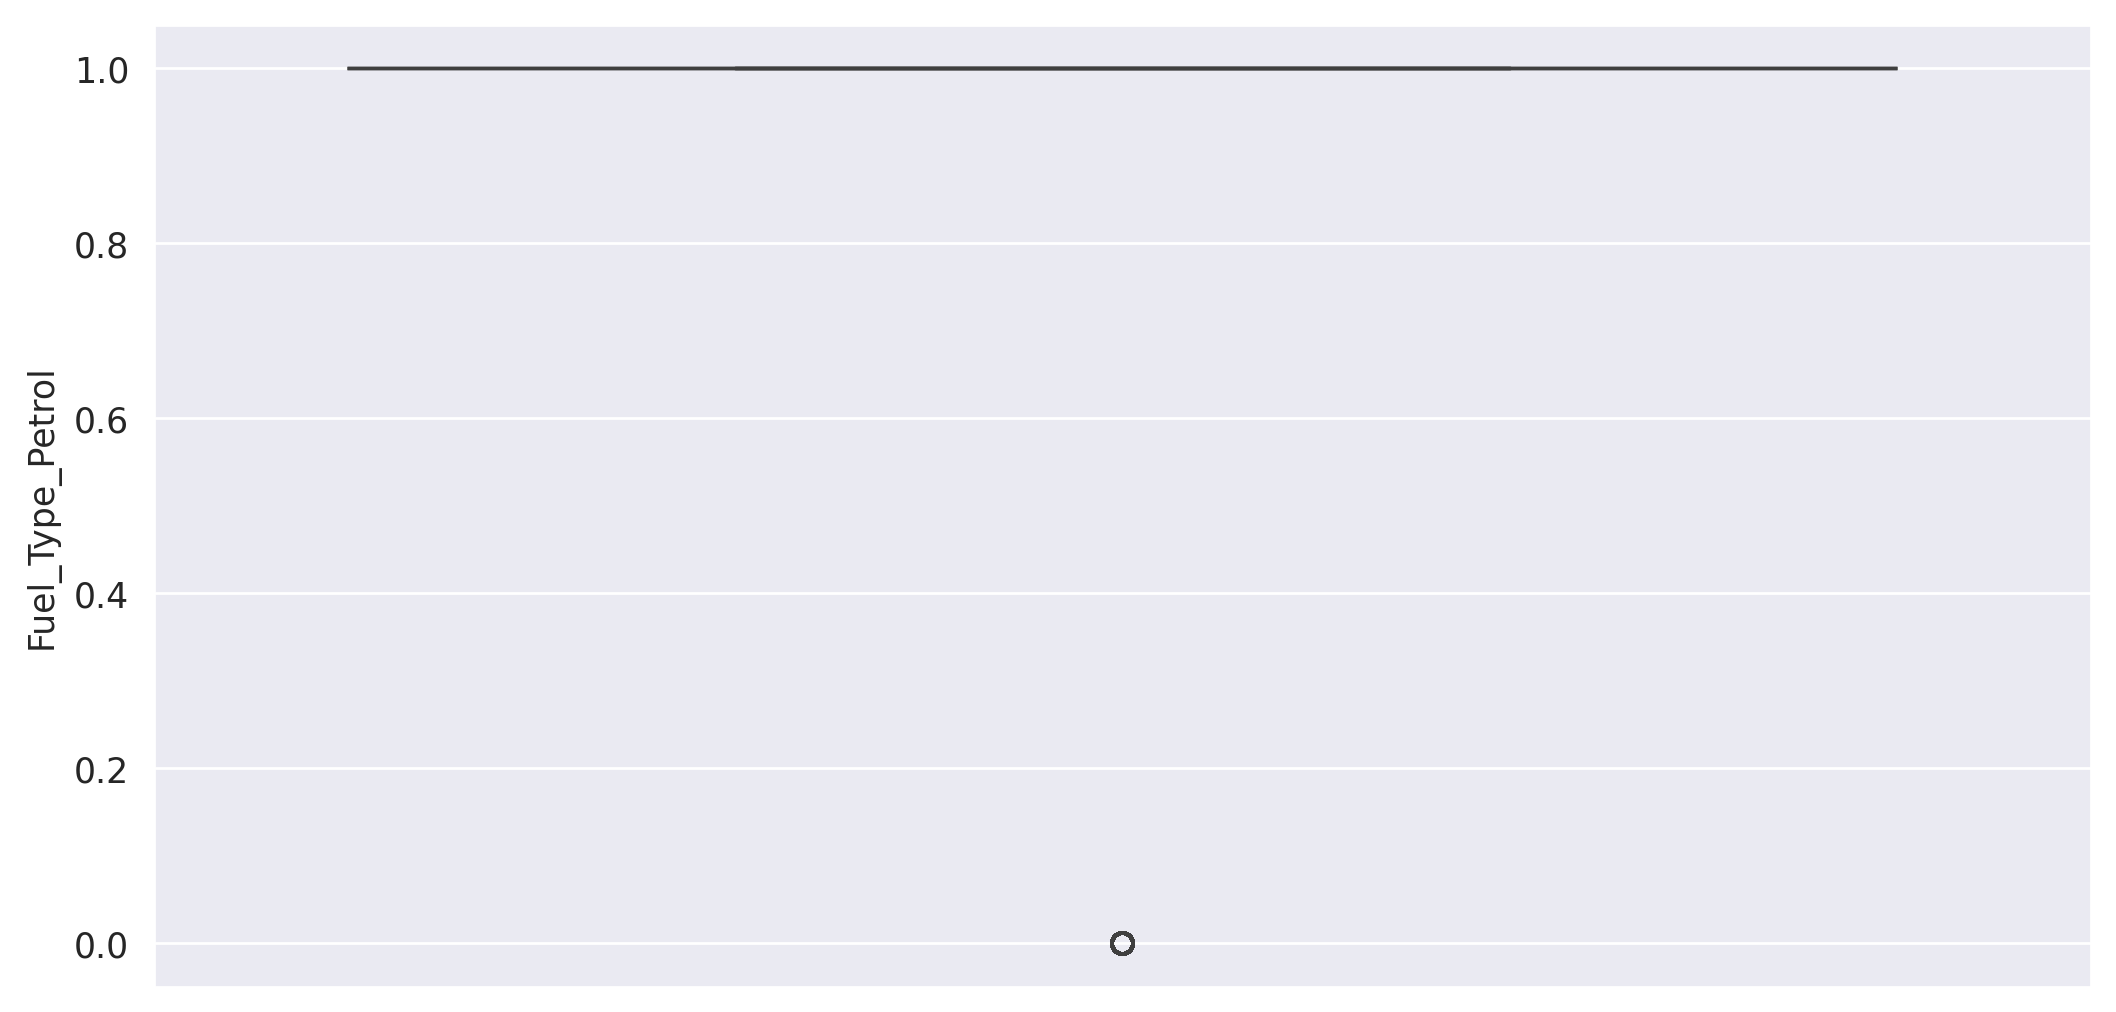

In [20]:
# Box Plots
for col in df1.columns:
    sns.boxplot(data=df1[col])
    plt.show()

We will perform Capping on all the columns

In [21]:
# Outliers are present in the following columns
# "Price","Age_08_04","KM", HP, CC and Weight
outliers_columns = list(df1.columns)
#outliers_columns = ["Price","Age","KM","HP","CC","Weight"]

# outlier_detection
def outlier_detection(data, col_name):
    Q1 = data[col_name].quantile(0.25)
    Q3 = data[col_name].quantile(0.75)
    IQR = Q3-Q1
    LE = Q1 - 1.5*IQR
    UE = Q3 + 1.5*IQR
    #return data.index[(data[col_name] < LE) | (data[col_name] > UE)].tolist()
    return LE,UE

# Dictionary for lower and upper extreme
LU_Extremes = {}
for col in outliers_columns:
    LU_Extremes[col] = outlier_detection(df1, col)
LU_Extremes

# Outliers Capping
for col in LU_Extremes:
    df1.loc[df1[col] < LU_Extremes[col][0] , col]=LU_Extremes[col][0]
    df1.loc[df1[col] > LU_Extremes[col][1] , col]=LU_Extremes[col][1]

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression

In [23]:
def model_fit(X,y):
    Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2, random_state=108)

    # creating a regression model
    model = LinearRegression()

    # fitting the model
    model.fit(Xtrain,ytrain)

    f_statistic, p_values = f_regression(Xtrain, ytrain)
    print("f_statistics =", f_statistic)
    print()
    print("p_values =", p_values)
    print()
    print("model_coeffs =", model.coef_)
    print()
    print("model_intercept =", model.intercept_)
    print()
    r2_score = model.score(Xtest,ytest)
    print("r2_score =", r2_score)
    print()

## Model 1

In [24]:
# X & y
X1 = df1.drop('Price', axis=1)
y1 = df1['Price']
model_fit(X1,y1)

f_statistics = [4399.36437543  674.76764139   88.43517926    0.           17.74896868
   45.51893925    0.          418.09101366    0.            0.
    0.        ]

p_values = [0.00000000e+000 2.36649293e-117 2.76286118e-020 1.00000000e+000
 2.71836479e-005 2.39385026e-011 1.00000000e+000 1.81286610e-079
 1.00000000e+000 1.00000000e+000 1.00000000e+000]

model_coeffs = [-1.05348879e+02 -1.58886186e-02  3.03080128e+01  1.35003120e-13
 -2.68205101e+00 -8.63357869e+01  0.00000000e+00  2.40780373e+01
  0.00000000e+00  0.00000000e+00  0.00000000e+00]

model_intercept = -6804.095089892342

r2_score = 0.8774490420501754



## Apply PCA

In [25]:
from sklearn.decomposition import PCA

In [26]:
# X & y
X = df1.drop('Price', axis=1)
y = df1['Price']

In [27]:
#Standardize the features
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X = pd.DataFrame(scaled_X, columns=X.columns)
scaled_X.head()

Age        KM        HP  Automatic        CC     Doors  Gears  \
0 -1.781129 -0.595118 -0.844145        0.0  2.024972 -1.084443    0.0   
1 -1.781129  0.152463 -0.844145        0.0  2.024972 -1.084443    0.0   
2 -1.727143 -0.747078 -0.844145        0.0  2.024972 -1.084443    0.0   
3 -1.619171 -0.565908 -0.844145        0.0  2.024972 -1.084443    0.0   
4 -1.403226 -0.839578 -0.844145        0.0  2.024972 -1.084443    0.0   

     Weight  Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Petrol  
0  2.226997            0.0               0.0               0.0  
1  2.226997            0.0               0.0               0.0  
2  2.226997            0.0               0.0               0.0  
3  2.226997            0.0               0.0               0.0  
4  2.226997            0.0               0.0               0.0

### $Implementation \ \ of \ \ PCA $

In [28]:
# Implimentation of PCA on scaled data
pca = PCA()
pcs = pca.fit(scaled_X)

In [29]:
# PCA Explained Variance
pca.explained_variance_ratio_

array([3.55260286e-01, 2.69848547e-01, 1.55958936e-01, 1.43343696e-01,
       4.96532592e-02, 2.59352758e-02, 5.14743729e-35, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [30]:
# Commulative PCA Explained Variance
np.cumsum(pca.explained_variance_ratio_)

array([0.35526029, 0.62510883, 0.78106777, 0.92441146, 0.97406472,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

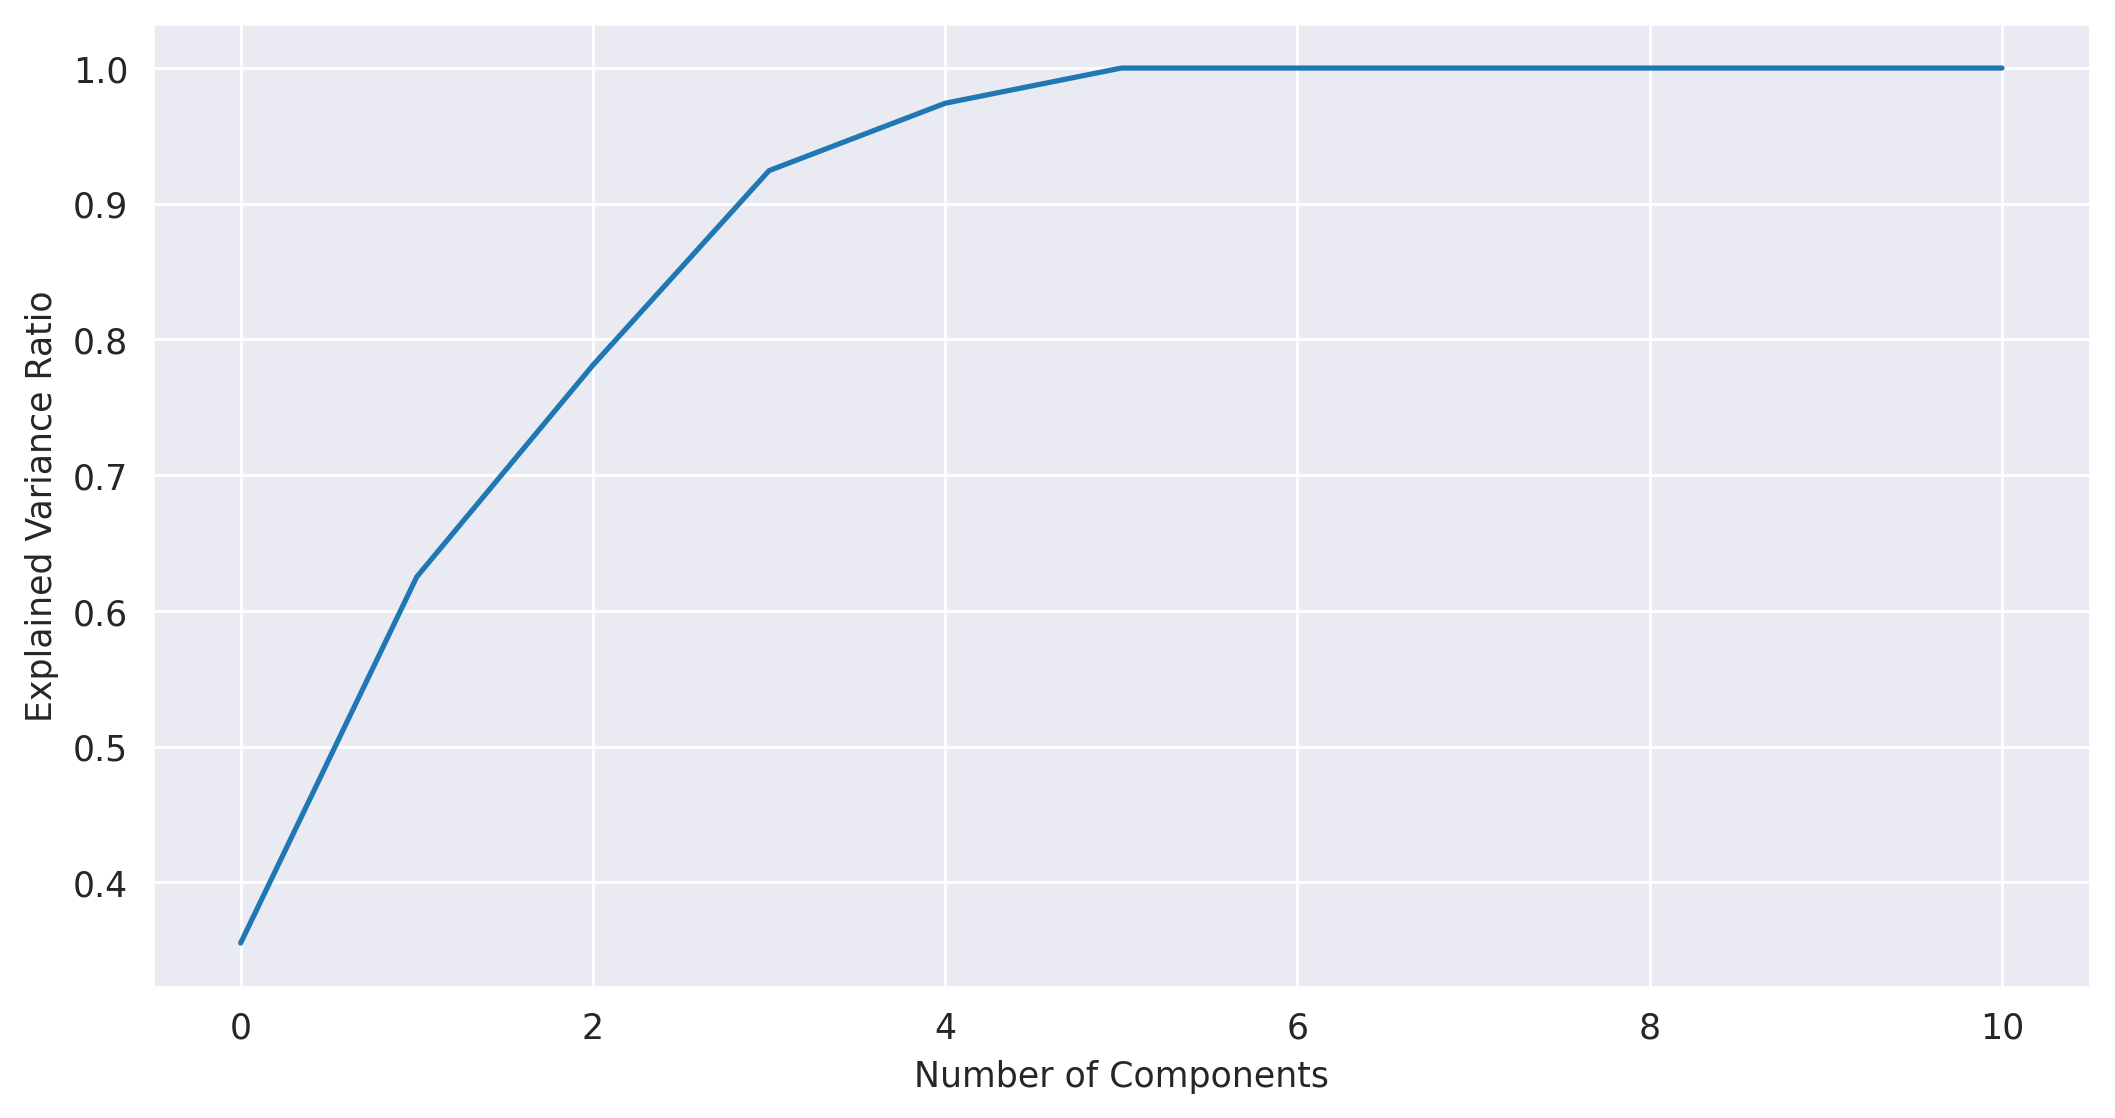

In [31]:
# Scree Plot
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

* first 5 Principal Components commulatively explains around 97% of variance, so we will choose first 5 PCs

In [32]:
# @title $Choose \ \ PCA \ \ Components$
n_comp = 5 # @param {type:"integer"}

pca = PCA(n_components=n_comp)
pcs = pca.fit_transform(scaled_X)
pcs

array([[ 2.6923805 ,  0.60452416,  2.15321079,  1.44500729, -0.36447399],
       [ 2.55710329,  1.12147294,  2.05699445,  1.44429057,  0.14840107],
       [ 2.69471184,  0.51956573,  2.14830016,  1.44473101, -0.50117699],
       ...,
       [-2.29663165, -1.36773057,  1.03829817, -0.23809737, -1.16294959],
       [-2.27094421, -1.38984315,  1.06313724, -0.23767264, -1.13247383],
       [ 1.19025563, -0.73692137, -1.00604272, -0.43849793, -2.0257755 ]])

In [33]:
pca_col_names = [('PC'+str(i)) for i in range(1,n_comp+1)]
pca_data = pd.DataFrame(pcs, columns=pca_col_names)
pca_data.head()

PC1       PC2       PC3       PC4       PC5
0  2.692381  0.604524  2.153211  1.445007 -0.364474
1  2.557103  1.121473  2.056994  1.444291  0.148401
2  2.694712  0.519566  2.148300  1.444731 -0.501177
3  2.611596  0.685085  2.076046  1.443713 -0.441790
4  2.560453  0.576325  2.013395  1.442288 -0.759349

In [34]:
# X & y
PCA_X1 = pca_data
y1 = df1['Price']
model_fit(PCA_X1,y1)

f_statistics = [1.08277371e+03 4.38028603e+02 9.72413414e+01 3.19142420e-01
 4.35016950e+01]

p_values = [9.99077676e-168 1.25595710e-082 4.50580726e-022 5.72234040e-001
 6.45408855e-011]

model_coeffs = [ 1406.24101741 -1235.16398945   852.66617562    77.17478675
   951.39304099]

model_intercept = 10483.573595559657

r2_score = 0.8788941635582747



## There is slight increase in accuracy after performing PCA

## Model 2

In [35]:
df1.describe()

Price          Age             KM           HP  Automatic  \
count   1435.000000  1435.000000    1435.000000  1435.000000     1435.0   
mean   10495.964460    55.992334   67644.520383   101.093380        0.0   
std     2977.598549    18.529725   34725.393258    13.146145        0.0   
min     4350.000000     5.000000       1.000000    69.000000        0.0   
25%     8450.000000    44.000000   43000.000000    90.000000        0.0   
50%     9900.000000    61.000000   63451.000000   110.000000        0.0   
75%    11950.000000    70.000000   87041.500000   110.000000        0.0   
max    17200.000000    80.000000  153103.750000   140.000000        0.0   

                CC        Doors   Gears       Weight  Fuel_Type_CNG  \
count  1435.000000  1435.000000  1435.0  1435.000000         1435.0   
mean   1558.327526     4.032753     5.0  1068.520906            0.0   
std     168.788311     0.952667     0.0    37.722708            0.0   
min    1300.000000     2.000000     5.0  1000.000000            0.0   
25%    1400.000000     3.000000     5.0  1040.000000            0.0   
50%    1600.000000     4.000000     5.0  1070.000000            0.0   
75%    1600.000000     5.000000     5.0  1085.000000            0.0   
max    1900.000000     5.000000     5.0  1152.500000            0.0   

       Fuel_Type_Diesel  Fuel_Type_Petrol  
count            1435.0            1435.0  
mean                0.0               1.0  
std                 0.0               0.0  
min                 0.0               1.0  
25%                 0.0               1.0  
50%                 0.0               1.0  
75%                 0.0               1.0  
max                 0.0               1.0

### Standard Deviation of following Columns "Automatic", "Gears", "Fuel_Type_CNG", "Fuel_Type_Diesel", "Fuel_Type_Petrol" is zero. We will drop these columns

In [36]:
df1.drop(columns=["Automatic","Gears","Fuel_Type_CNG","Fuel_Type_Diesel","Fuel_Type_Petrol"], inplace=True)

## Calculate VIF

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X2 = df1.drop(columns=["Price"])
y2 = df1['Price']

In [38]:
vif = pd.DataFrame()
vif['Features'] = X2.columns
vif['VIF'] = [variance_inflation_factor(X2.values,i) for i in range(len(X2.columns))]
vif

Features         VIF
0      Age   14.707025
1       KM    9.206475
2       HP   67.693493
3       CC  159.375486
4    Doors   21.247320
5   Weight  230.822581

In [39]:
df1.columns

Index(['Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'Weight'], dtype='object')

<Axes: xlabel='Age', ylabel='KM'>

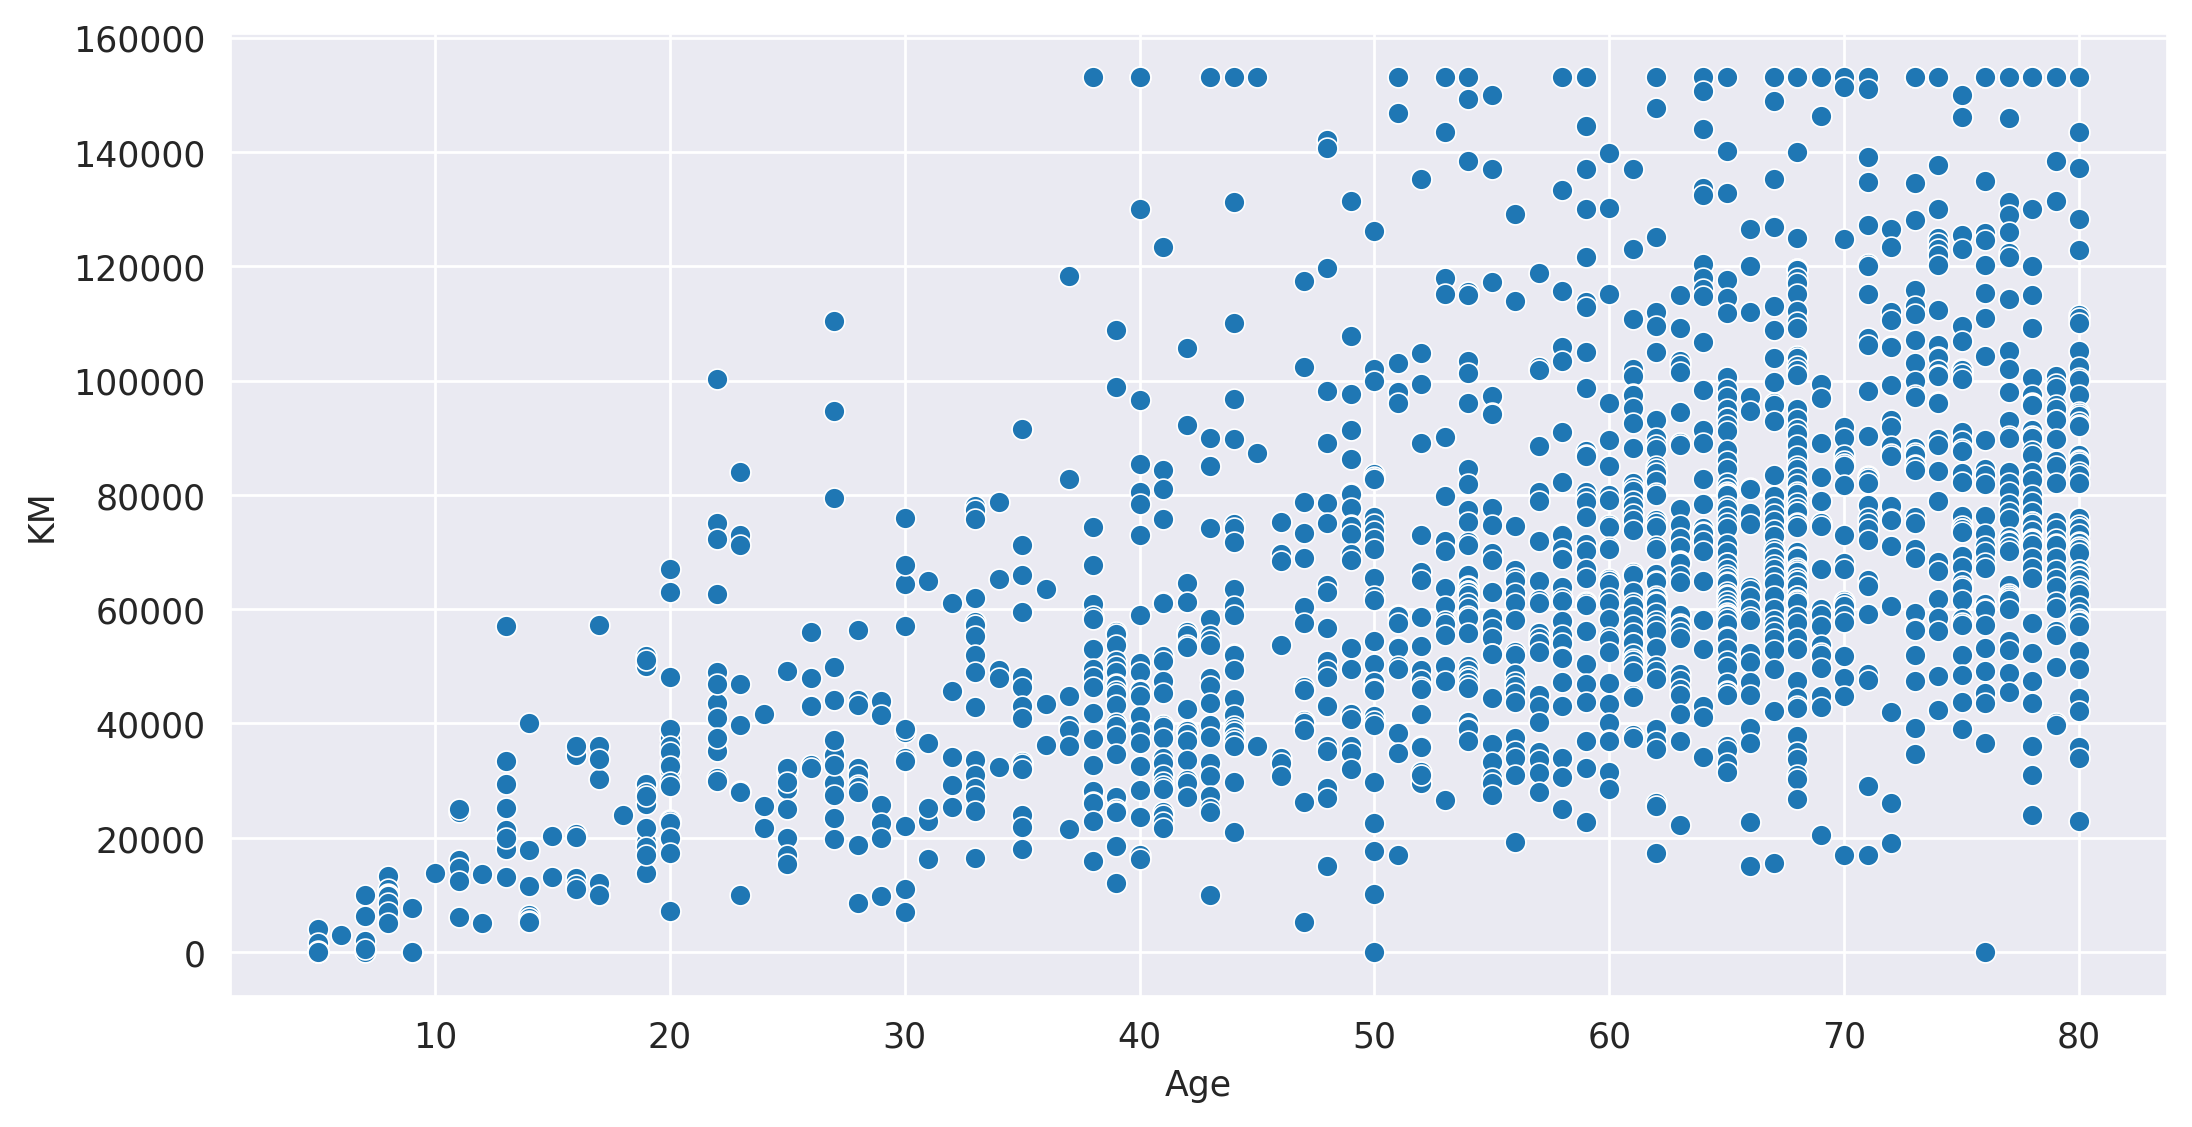

In [40]:
# Scatter Plot
sns.scatterplot(x='Age',y='KM',data=df1)

### Still the columns "Weight" and "CC" are having very high VIF score. Also, weight and cc are generally related, we will combine these two columns

In [41]:
# Scalling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X2 = scaler.fit_transform(X2)
scaled_X2 = pd.DataFrame(scaled_X2, columns=X2.columns)
scaled_X2.head()

Age        KM        HP        CC     Doors    Weight
0 -1.781129 -0.595118 -0.844145  2.024972 -1.084443  2.226997
1 -1.781129  0.152463 -0.844145  2.024972 -1.084443  2.226997
2 -1.727143 -0.747078 -0.844145  2.024972 -1.084443  2.226997
3 -1.619171 -0.565908 -0.844145  2.024972 -1.084443  2.226997
4 -1.403226 -0.839578 -0.844145  2.024972 -1.084443  2.226997

## Combine columns CC and Weight

In [42]:
# Combine CC and Weight
scaled_X2['Age_KM'] = (scaled_X2['Age']+scaled_X2['KM'])/2
scaled_X2

Age        KM        HP        CC     Doors    Weight    Age_KM
0    -1.781129 -0.595118 -0.844145  2.024972 -1.084443  2.226997 -1.188124
1    -1.781129  0.152463 -0.844145  2.024972 -1.084443  2.226997 -0.814333
2    -1.727143 -0.747078 -0.844145  2.024972 -1.084443  2.226997 -1.237110
3    -1.619171 -0.565908 -0.844145  2.024972 -1.084443  2.226997 -1.092539
4    -1.403226 -0.839578 -0.844145  2.024972 -1.084443  2.226997 -1.121402
...        ...       ...       ...       ...       ...       ...       ...
1430  0.702234 -1.356844 -1.148522 -1.531016 -1.084443 -1.154108 -0.327305
1431  0.864192 -1.401323 -1.148522 -1.531016 -1.084443 -1.419293 -0.268565
1432  0.810206 -1.458477 -1.148522 -1.531016 -1.084443 -1.419293 -0.324135
1433  0.756220 -1.461357 -1.148522 -1.531016 -1.084443 -1.419293 -0.352569
1434  1.080137 -1.948635  0.677744  0.246978  1.015659  1.206036 -0.434249

[1435 rows x 7 columns]

In [43]:
# Drop CC and Weight
scaled_X2.drop(columns=["Age","KM"], inplace=True)

In [44]:
# X & y
model_fit(scaled_X2,y2)

f_statistics = [  88.43517926   17.74896868   45.51893925  418.09101366 3233.39551828]

p_values = [2.76286118e-20 2.71836479e-05 2.39385026e-11 1.81286610e-79
 0.00000000e+00]

model_coeffs = [  248.33172831  -399.08768822  -110.64100043  1246.26441642
 -2459.75176136]

model_intercept = 10492.344324169748

r2_score = 0.8251755972509826



In [45]:
vif = pd.DataFrame()
vif['Features'] = scaled_X2.columns
vif

Features
0       HP
1       CC
2    Doors
3   Weight
4   Age_KM

In [46]:
vif['VIF'] = [variance_inflation_factor(scaled_X2.values,i) for i in range(len(scaled_X2.columns))]
vif

Features       VIF
0       HP  1.191485
1       CC  2.809126
2    Doors  1.281093
3   Weight  3.405861
4   Age_KM  1.482106

# Model 3

# Insted of One Hot Encoding we will perform Label Encoding on all categorical columns, since after OHE there is High Multicolinearity, and also we will not perform capping, since after capping most of these categorical columns are having standard deviation zero.

In [47]:
df2 = df.copy()
df2.describe()

Price          Age             KM           HP    Automatic  \
count   1435.000000  1435.000000    1435.000000  1435.000000  1435.000000   
mean   10720.915679    55.980488   68571.782578   101.491986     0.055749   
std     3608.732978    18.563312   37491.094553    14.981408     0.229517   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63451.000000   110.000000     0.000000   
75%    11950.000000    70.000000   87041.500000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                 CC        Doors        Gears       Weight  
count   1435.000000  1435.000000  1435.000000  1435.000000  
mean    1576.560976     4.032753     5.026481  1072.287108  
std      424.387533     0.952667     0.188575    52.251882  
min     1300.000000     2.000000     3.000000  1000.000000  
25%     1400.000000     3.000000     5.000000  1040.000000  
50%     1600.000000     4.000000     5.000000  1070.000000  
75%     1600.000000     5.000000     5.000000  1085.000000  
max    16000.000000     5.000000     6.000000  1615.000000

In [48]:
df2.describe(include='object')

Fuel_Type
count       1435
unique         3
top       Petrol
freq        1264

In [49]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2['Fuel_Type'] = le.fit_transform(df2['Fuel_Type'])

In [50]:
X3 = df2.drop(columns=["Price"])
y3 = df2['Price']

In [51]:
# X & y
model_fit(X3,y3)

f_statistics = [3.81992053e+03 5.63711691e+02 3.14197708e-01 1.27626894e+02
 2.25750054e+00 1.66042677e+01 4.51389243e+01 3.01144193e+00
 5.38347091e+02]

p_values = [0.00000000e+000 1.14919862e-101 5.75225219e-001 3.90897793e-028
 1.33244011e-001 4.92192741e-005 2.88506124e-011 8.29475309e-002
 6.11815361e-098]

model_coeffs = [-1.22905482e+02 -1.69234640e-02  9.73750003e+02  2.06842994e+01
  4.20937248e+02 -4.00581430e-02 -3.31314659e+01  5.76317582e+02
  2.12518382e+01]

model_intercept = -10692.018766892017

r2_score = 0.8655795335365201



In [52]:
vif = pd.DataFrame()
vif['Features'] = X3.columns
vif

Features
0        Age
1         KM
2  Fuel_Type
3         HP
4  Automatic
5         CC
6      Doors
7      Gears
8     Weight

In [53]:
vif['VIF'] = [variance_inflation_factor(X3.values,i) for i in range(len(X3.columns))]
vif

Features         VIF
0        Age   17.068408
1         KM    8.455278
2  Fuel_Type   49.229999
3         HP   66.454137
4  Automatic    1.122593
5         CC   17.284782
6      Doors   22.445801
7      Gears  524.954534
8     Weight  465.439892

# 5. Apply Lasso and Ridge methods on the model.

## Lasso

In [54]:
# Train Test Split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X1,y1,test_size=0.2, random_state=108)

In [55]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
l1 = Lasso()
l1.fit(xtrain,ytrain)
l1.score(xtrain,ytrain), l1.score(xtest,ytest)

(0.8599208836909871, 0.8774474501971934)

##Hyperparameter Tuning

In [56]:
l1_train = []
l1_test = []
for i in range(100,200):
    l1 = Lasso(alpha=i)
    l1.fit(xtrain,ytrain)
    l1_train.append(l1.score(xtrain,ytrain))
    l1_test.append(l1.score(xtest,ytest))
    print(f"Alpha: {i} Train : {l1.score(xtrain,ytrain)} Test: {l1.score(xtest,ytest)}")

Alpha: 100 Train : 0.8593264012571702 Test: 0.8768422721899025
Alpha: 101 Train : 0.8593260794173294 Test: 0.8768463419700395
Alpha: 102 Train : 0.8593257543788394 Test: 0.8768504079834971
Alpha: 103 Train : 0.8593254261417003 Test: 0.8768544702302755
Alpha: 104 Train : 0.8593250947059119 Test: 0.8768585287103745
Alpha: 105 Train : 0.8593247600714744 Test: 0.876862583423794
Alpha: 106 Train : 0.8593244222383876 Test: 0.8768666343705342
Alpha: 107 Train : 0.8593240812066517 Test: 0.8768706815505951
Alpha: 108 Train : 0.8593237369762665 Test: 0.8768747249639766
Alpha: 109 Train : 0.8593233895472323 Test: 0.8768787646106787
Alpha: 110 Train : 0.8593230389195488 Test: 0.8768828004907014
Alpha: 111 Train : 0.8593226850932161 Test: 0.8768868326040448
Alpha: 112 Train : 0.8593223280682342 Test: 0.8768908609507089
Alpha: 113 Train : 0.859321967844603 Test: 0.8768948855306935
Alpha: 114 Train : 0.8593216044223227 Test: 0.8768989063439988
Alpha: 115 Train : 0.8593212378013932 Test: 0.87690292339

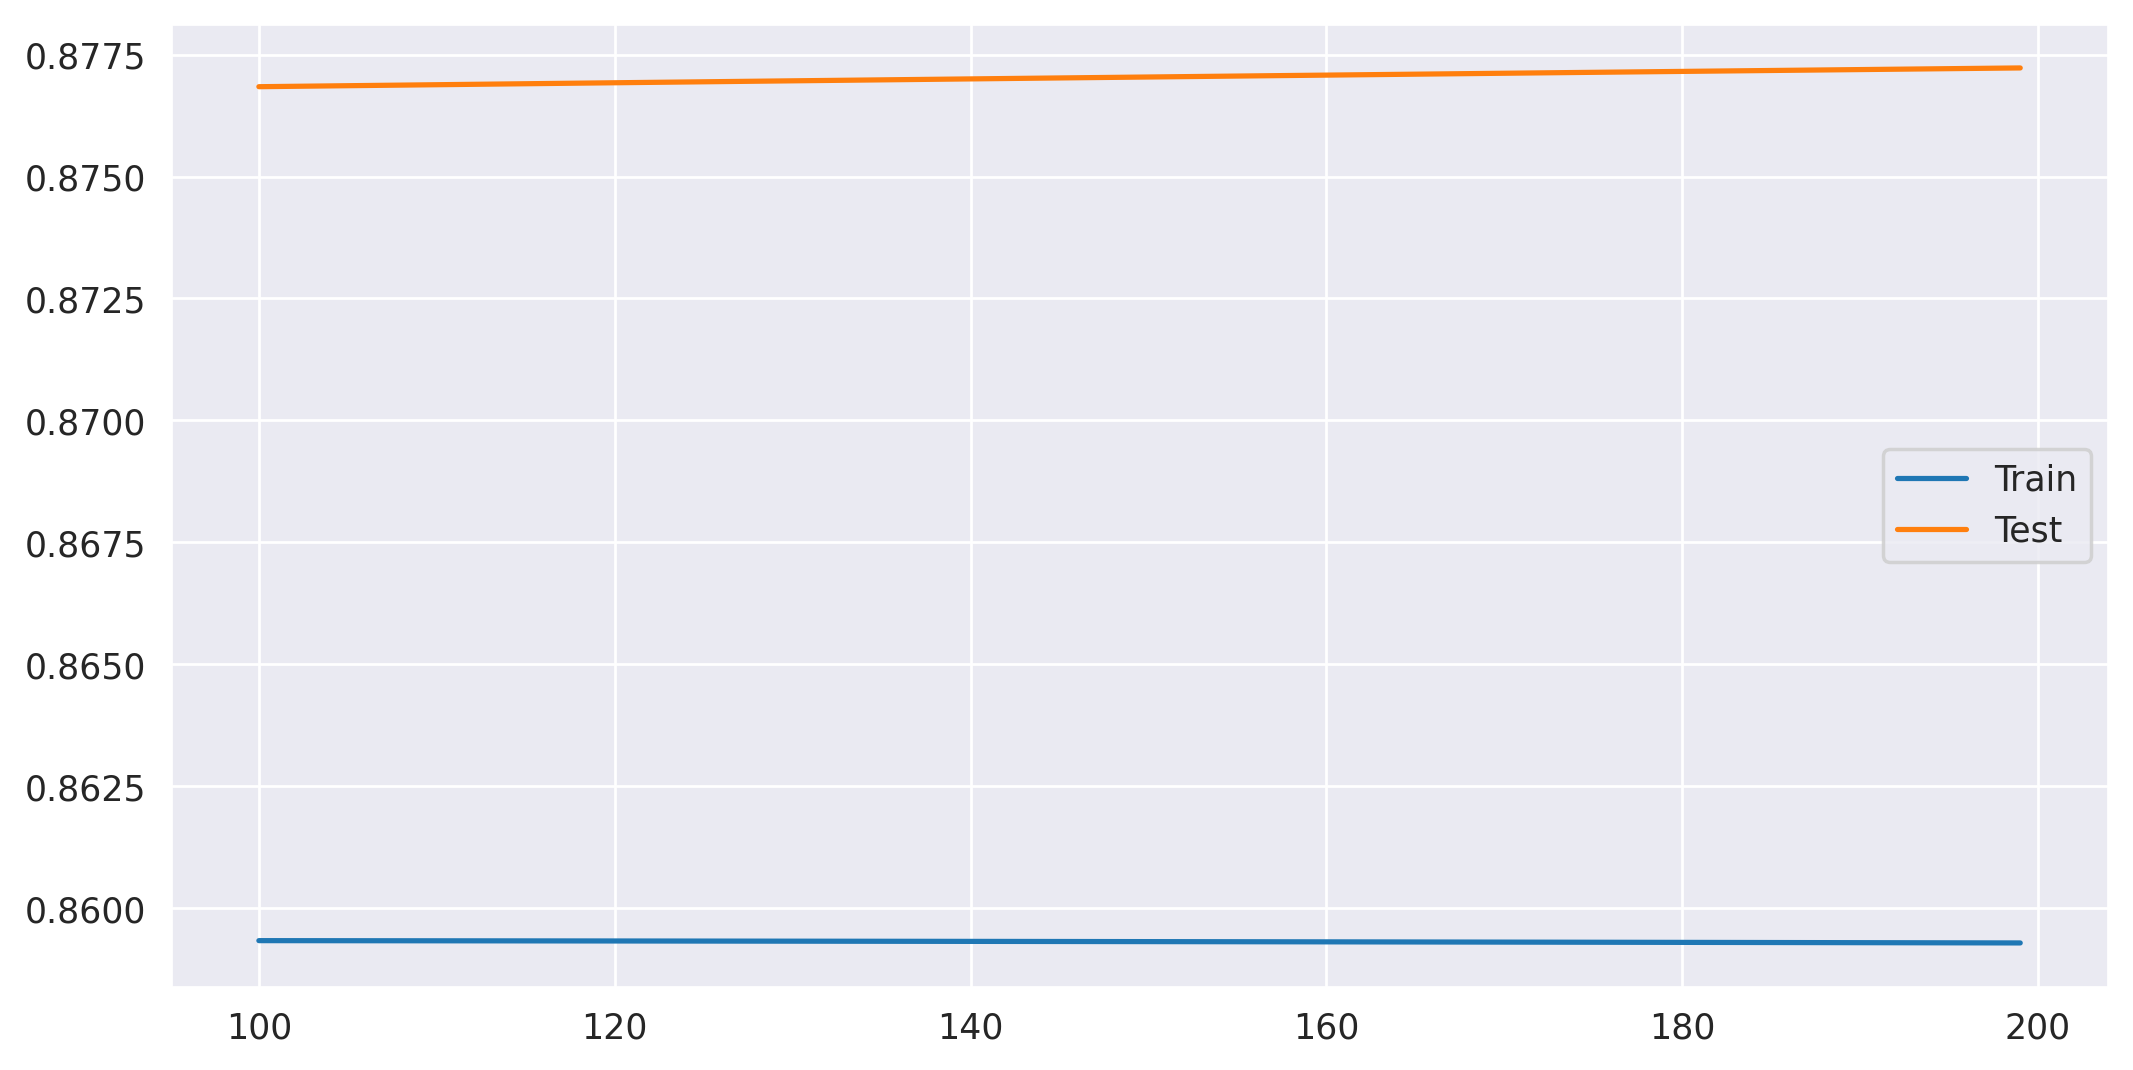

In [57]:
# Line Plots
plt.plot(range(100,200),l1_train, label='Train')
plt.plot(range(100,200),l1_test, label='Test')
plt.legend()

In [58]:
l1 = Lasso(alpha=1)
l1.fit(xtrain,ytrain)
l1.score(xtrain,ytrain), l1.score(xtest,ytest)

(0.8599208836909871, 0.8774474501971934)

#Ridge

In [59]:
l2 = Ridge()
l2.fit(xtrain,ytrain)
l2.score(xtrain,ytrain), l2.score(xtest,ytest)

(0.8599210501546604, 0.8774485925345004)

In [60]:
l2_train=[]
l2_test=[]
for i in range(1,100):
    l2 = Ridge(alpha=i)
    l2.fit(xtrain,ytrain)
    l2_train.append(l2.score(xtrain,ytrain))
    l2_test.append(l2.score(xtest,ytest))
    print(f"Alpha: {i} Train: {l2.score(xtrain,ytrain)} Test: {l2.score(xtest,ytest)}")

Alpha: 1 Train: 0.8599210501546604 Test: 0.8774485925345004
Alpha: 2 Train: 0.859921047481279 Test: 0.877448141992188
Alpha: 3 Train: 0.859921043041671 Test: 0.8774476904346531
Alpha: 4 Train: 0.8599210368488396 Test: 0.8774472378732158
Alpha: 5 Train: 0.8599210289156918 Test: 0.8774467843191034
Alpha: 6 Train: 0.8599210192550394 Test: 0.8774463297834503
Alpha: 7 Train: 0.8599210078795996 Test: 0.8774458742772997
Alpha: 8 Train: 0.8599209948019955 Test: 0.8774454178116031
Alpha: 9 Train: 0.8599209800347578 Test: 0.877444960397223
Alpha: 10 Train: 0.8599209635903244 Test: 0.8774445020449316
Alpha: 11 Train: 0.8599209454810418 Test: 0.8774440427654129
Alpha: 12 Train: 0.859920925719166 Test: 0.8774435825692628
Alpha: 13 Train: 0.8599209043168626 Test: 0.8774431214669905
Alpha: 14 Train: 0.8599208812862082 Test: 0.8774426594690188
Alpha: 15 Train: 0.8599208566391906 Test: 0.8774421965856849
Alpha: 16 Train: 0.85992083038771 Test: 0.8774417328272408
Alpha: 17 Train: 0.8599208025435792 Test

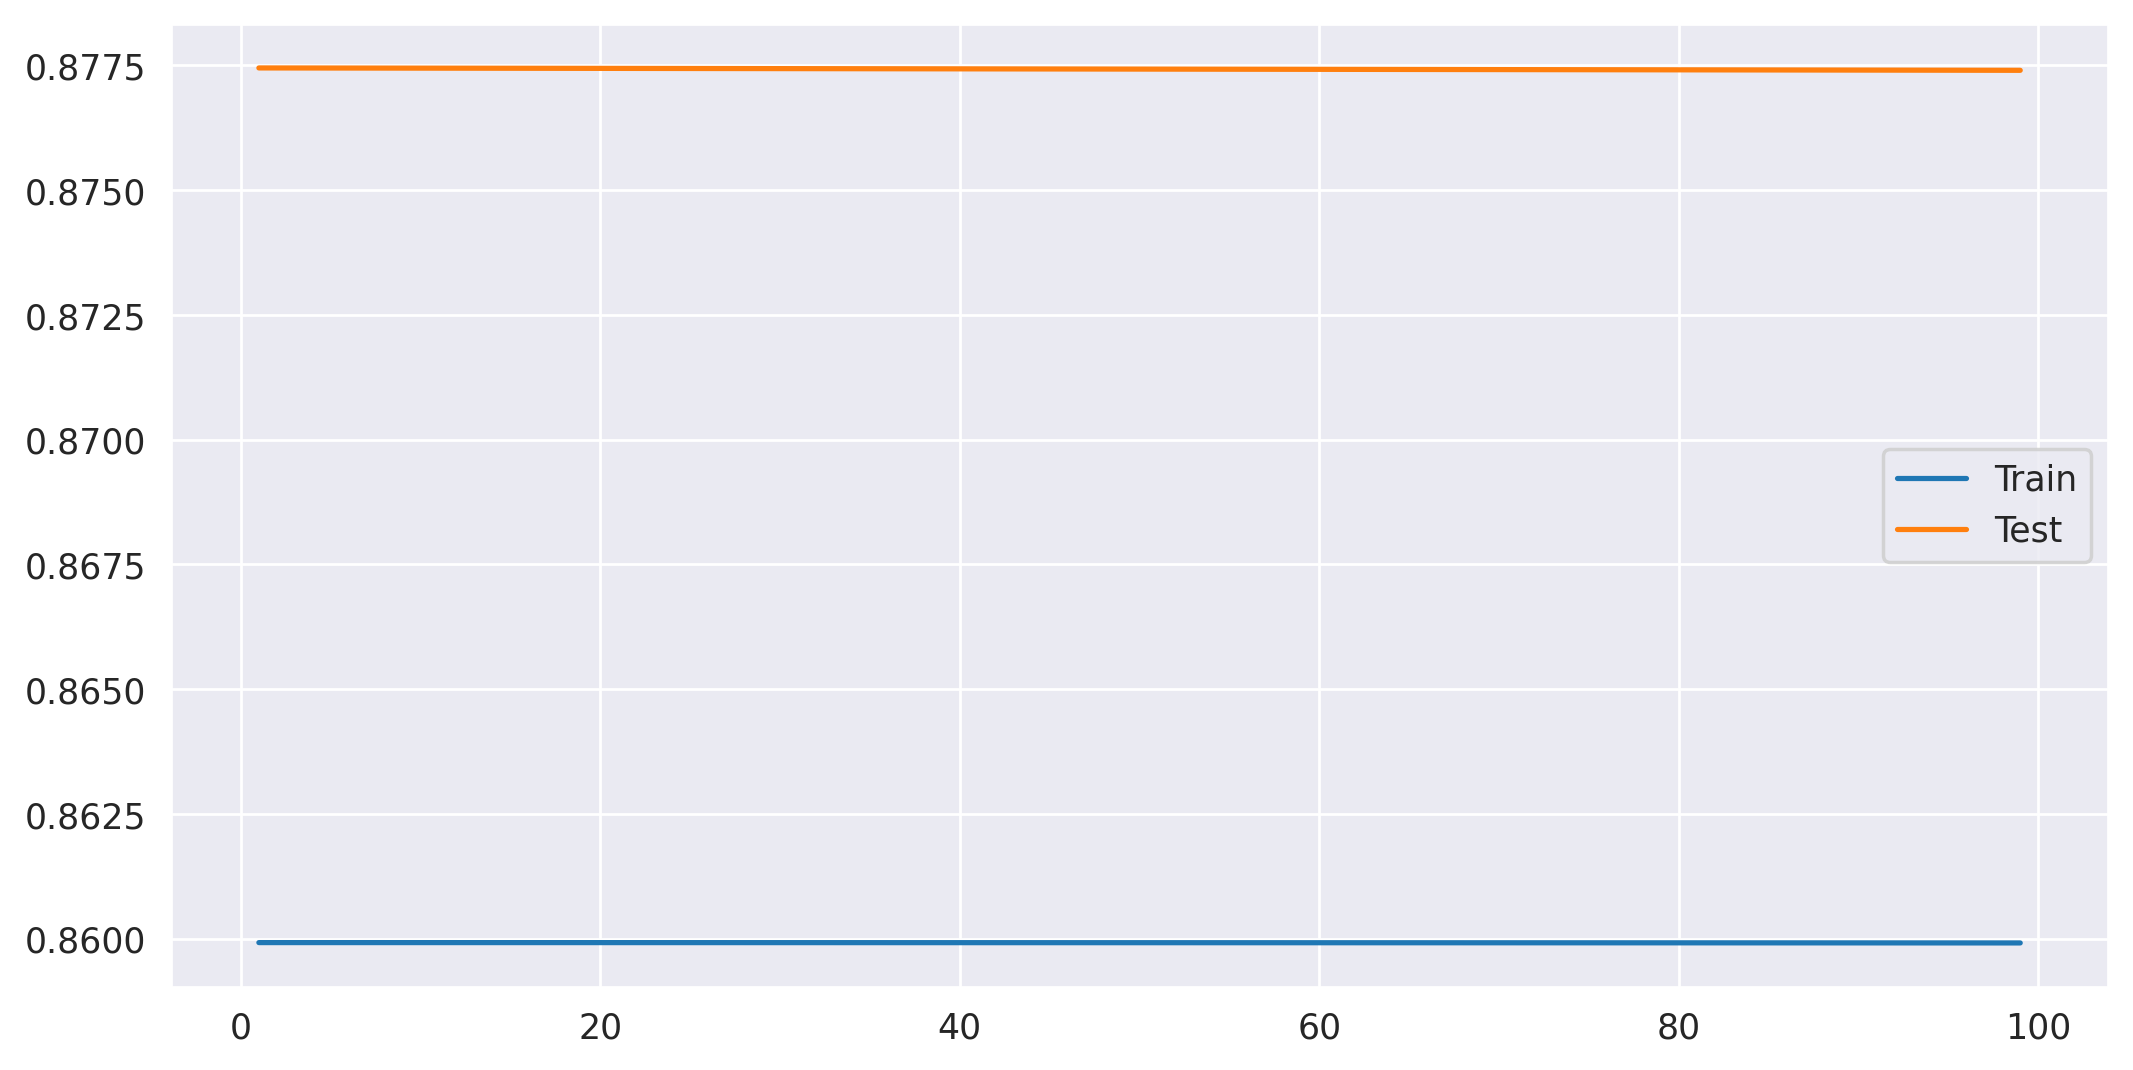

In [61]:
# Line Plots
plt.plot(range(1,100),l2_train, label='Train')
plt.plot(range(1,100),l2_test, label='Test')
plt.legend()

In [62]:
l2 = Ridge(alpha=1)
l2.fit(xtrain,ytrain)
l2.score(xtrain,ytrain), l2.score(xtest,ytest)

(0.8599210501546604, 0.8774485925345004)

## I Have not found much improvement even after applying Lasso and Ridge regressions

# Interview Questions:

### Q1. What is Normalization & Standardization and how is it helpful?

Normalization and standardization are techniques used to adjust the values of numeric data to a common scale, improving the performance and accuracy of machine learning algorithms.

Normalization scales data to a range of [0, 1] or [-1, 1], typically using min-max scaling. This is helpful when the data has varying scales and when algorithms assume data in a specific range.

Standardization scales data to have a mean of 0 and a standard deviation of 1, using z-scores. This is useful when data has different units and for algorithms that assume normally distributed data.

Both techniques help in faster convergence, improved accuracy, and better performance of machine learning models by ensuring that features contribute equally.

### Q2. What techniques can be used to address multicollinearity in multiple linear regression?

To address multicollinearity in multiple linear regression, several techniques can be employed:

**Remove Highly Correlated Predictors:** Identify and eliminate one of the highly correlated variables to reduce redundancy.

**Principal Component Analysis (PCA):** Transform the original variables into a smaller set of uncorrelated components.

**Ridge Regression (L2 Regularization):** Adds a penalty on the size of coefficients, shrinking them to reduce the impact of multicollinearity.

**Lasso Regression (L1 Regularization):** Adds a penalty that can shrink some coefficients to zero, effectively selecting a simpler model.

**Variance Inflation Factor (VIF):** Calculate VIF for each predictor and remove variables with high VIF values (typically > 10).

**Partial Least Squares (PLS)** Regression: Similar to PCA, it finds components that have the highest covariance with the response variable.

**Data Collection:** If possible, gather more data to reduce the impact of multicollinearity.

These techniques help improve model stability and interpretation by mitigating the adverse effects of multicollinearity.